# Notebook for Social audit

This is a notebook processing the questionnaire responses for social audit work done with the residents of Sri Tanjung Apartment in USJ 16.

```
Text in quoted blocks like this as well as data presented in tabular form and graphs can be copied and used in final report
```

## Setup

Quick setup to load the data

In [1]:
%matplotlib inline

import csv
from functools import reduce

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sinar_social_audit_2020 import preprocessor, fields, distribution, relation

plt.rcParams['figure.figsize'] = [10, 8]

with open("./responses.csv", "r") as file_responses:
    reader_responses = csv.reader(file_responses)

    headers = tuple(preprocessor.field_name(field) for field in next(reader_responses))

    df = pd.DataFrame(data=reader_responses, columns=headers, dtype=str)

## Distribution of responses for each question

These are the distribution of responses for each questions (some further broken down as needed).

### Demographic study

#### Gender

The following cell shows the distribution of gender, unfortunately, as the field was only added after some time the questionnaire went online so. In total there were 28 entries where gender isn't captured.

28 entries with no gender information.


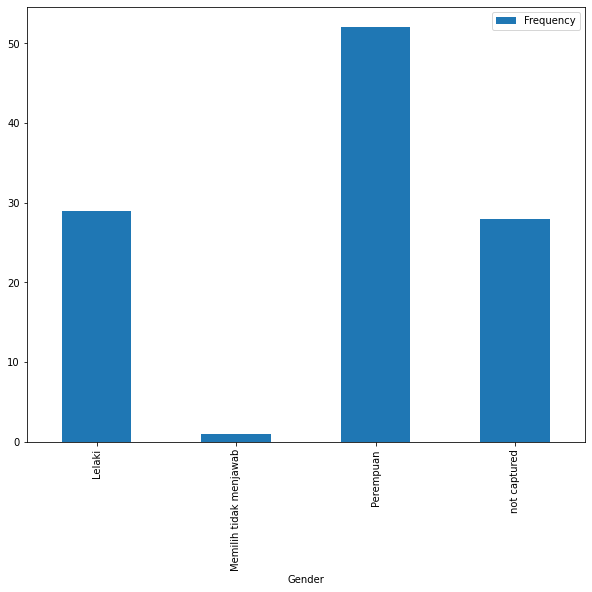

In [2]:
print(
    "{} entries with no gender information.".format(
        df[df[fields.FIELD_GENDER] == ""][fields.FIELD_GENDER].count()
    )
)

normalized_gender, summary_gender = distribution.distinct(
    df, fields.FIELD_GENDER, "Gender"
)

#### Age

The following cell shows the age distribution of the respondent.

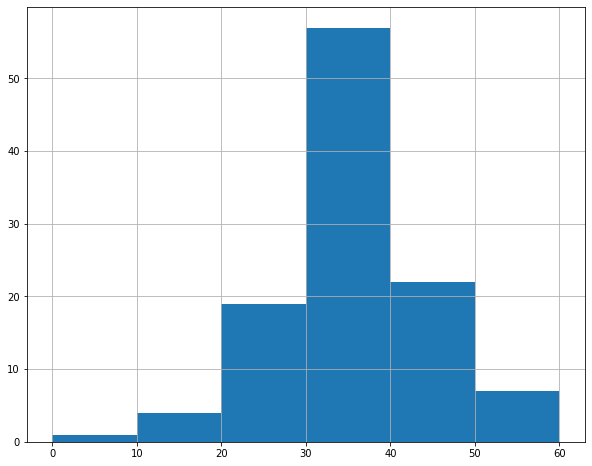

In [3]:
normalized_age, summary_age = distribution.number(
    df, fields.FIELD_AGE, "Age", (0, 10, 20, 30, 40, 50, 60)
)

#### Education level

The following shows the distribution of education level

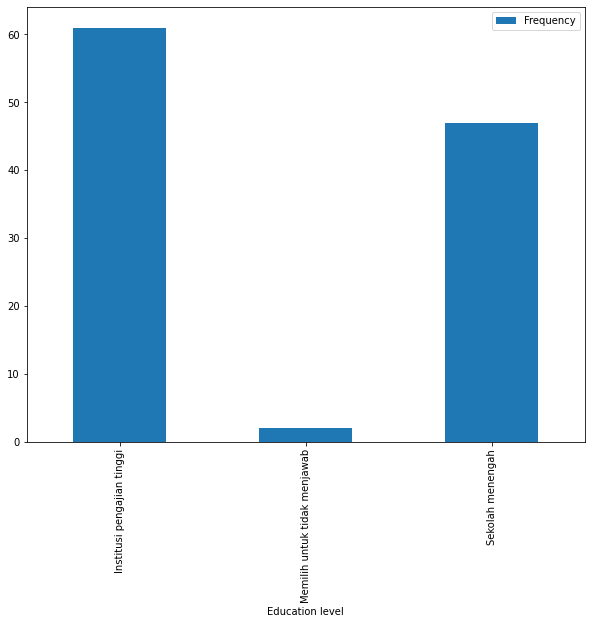

In [4]:
normalized_edulevel, summary_edulevel = distribution.distinct(
    df, fields.FIELD_EDUCATION_LEVEL, "Education level"
)

#### Employment status

The following shows the distribution of employment

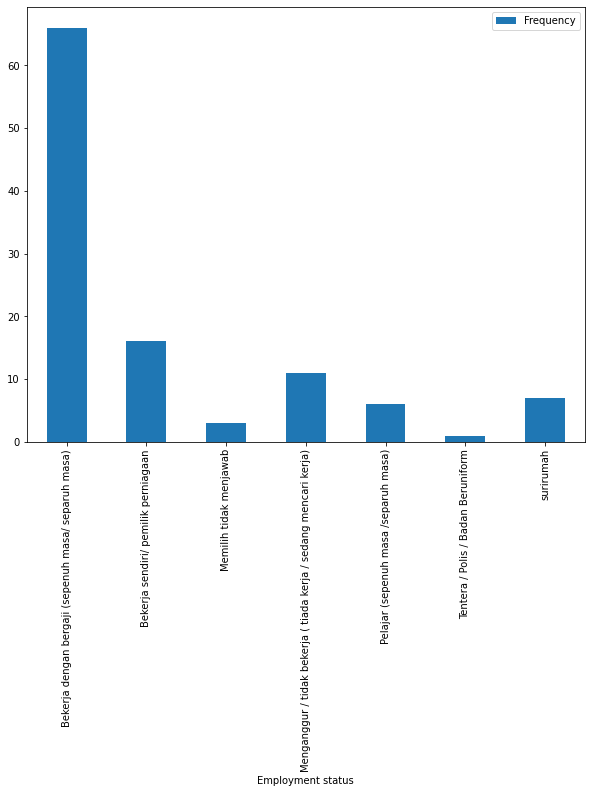

In [5]:
normalized_employment, summary_employment = distribution.distinct(
    df,
    fields.FIELD_EMPLOYMENT_STATUS,
    "Employment status",
    preprocessor.employment_status,
)

#### Household income

The following cell shows the distribution of household income and the respective histogram.

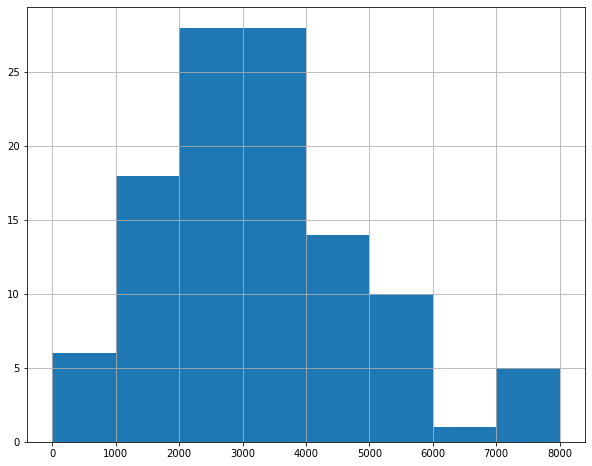

In [6]:
normalized_income, summary_income = distribution.number(
    df, fields.FIELD_HOUSEHOLD_INCOME, "Household income", 8, preprocessor.income
)

#### Family size

The following shows the distribution of family size

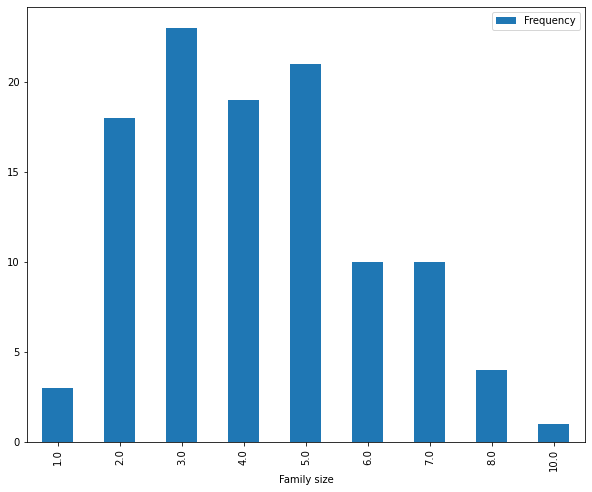

In [7]:
normalized_family_size, summary_family_size = distribution.distinct(
    df,
    fields.FIELD_FAMILY_SIZE,
    "Family size",
    lambda x: preprocessor.value_integer(x)
    if preprocessor.value_integer(x) <= 10
    else np.nan,
)

### Accessing the Internet and Challenges

#### How do you access government services

The following shows how respondents access government services, please note that the options are not mutually exclusive

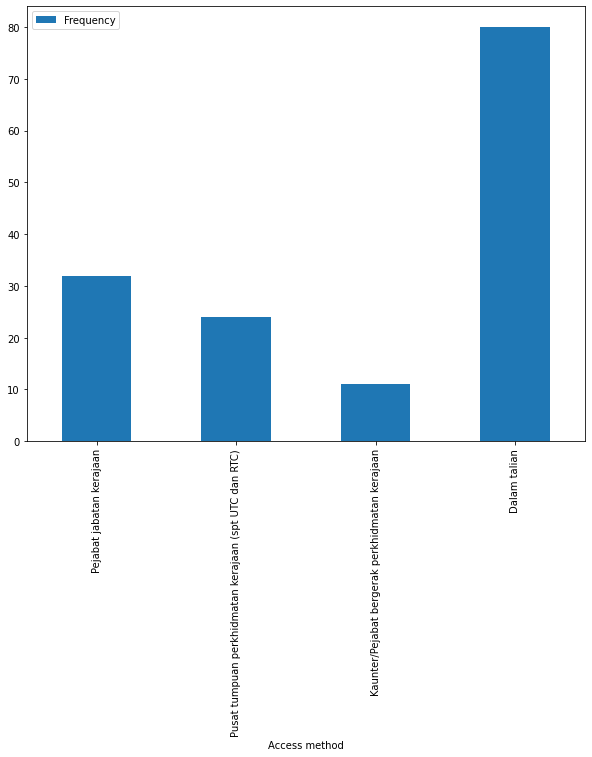

In [8]:
normalized_public_access_method, summary_public_access_method = distribution.mcq(
    df,
    fields.FIELD_PUBLIC_ACCESS_METHOD,
    "Access method",
    (
        "Pejabat jabatan kerajaan",
        "Pusat tumpuan perkhidmatan kerajaan (spt UTC dan RTC)",
        "Kaunter/Pejabat bergerak perkhidmatan kerajaan",
        "Dalam talian",
    ),
)

#### Do you own and often use these equipments

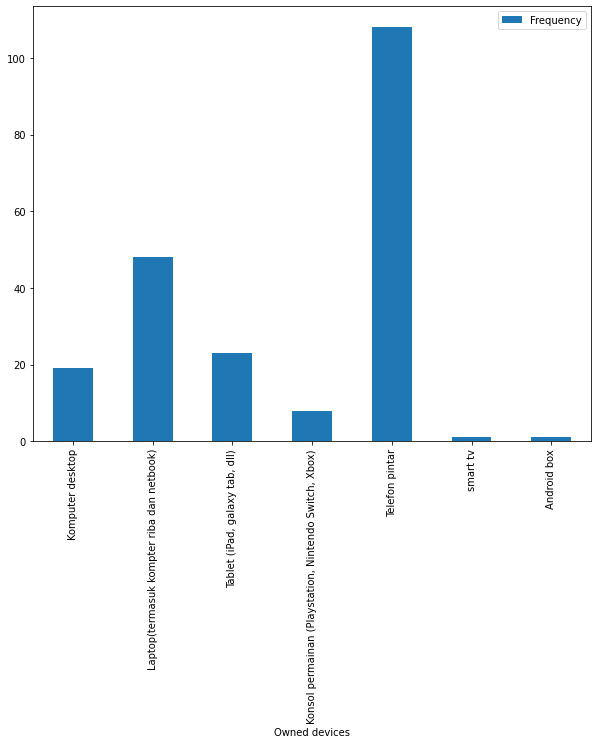

In [9]:
normalized_owned_devices, summary_owned_devices = distribution.mcq(
    df,
    fields.FIELD_OWNED_DEVICES,
    "Owned devices",
    (
        "Komputer desktop",
        "Laptop(termasuk kompter riba dan netbook)",
        "Tablet (iPad, galaxy tab, dll)",
        "Konsol permainan (Playstation, Nintendo Switch, Xbox)",
        "Telefon pintar",
        "smart tv",
        "Android box",
    ),
)

#### Do you use internet for as long as you wanted

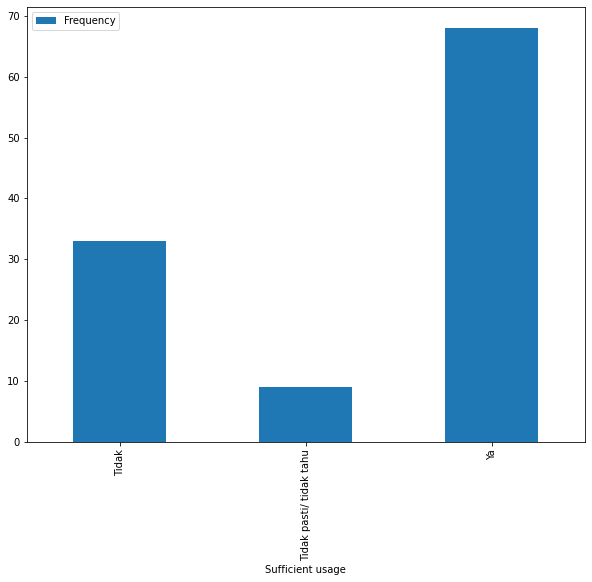

In [10]:
normalized_sufficient_usage, summary_sufficient_usage = distribution.distinct(
    df, fields.FIELD_SUFFICIENT_USAGE, "Sufficient usage"
)

#### Have you used free WiFi services in public areas in the past

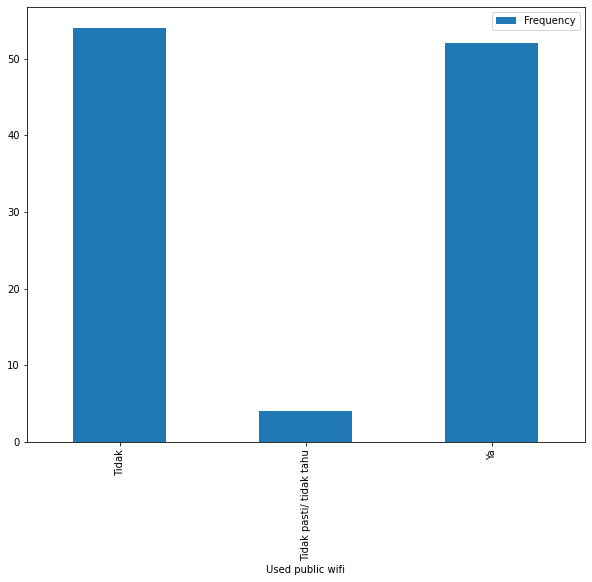

In [11]:
normalized_used_public_wifi, summary_used_public_wifi = distribution.distinct(
    df, fields.FIELD_USED_PUBLIC_WIFI, "Used public wifi"
)

#### Have you used free WiFi services provided by the government

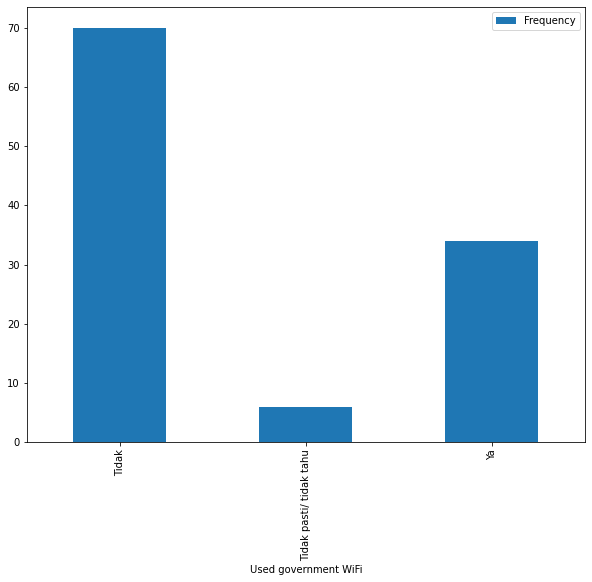

In [12]:
normalized_used_selangor_wifi, summary_used_selangor_wifi = distribution.distinct(
    df, fields.FIELD_USED_SELANGOR_WIFI, "Used government WiFi"
)

#### Are you able to work from home

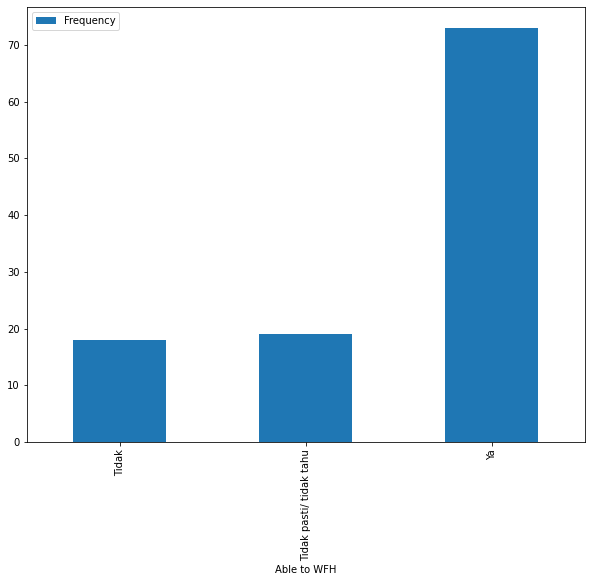

In [13]:
normalized_wfh, summary_wfh = distribution.distinct(
    df, fields.FIELD_CAN_WORK_FROM_HOME, "Able to WFH"
)

#### Are you being comfortable with working from home

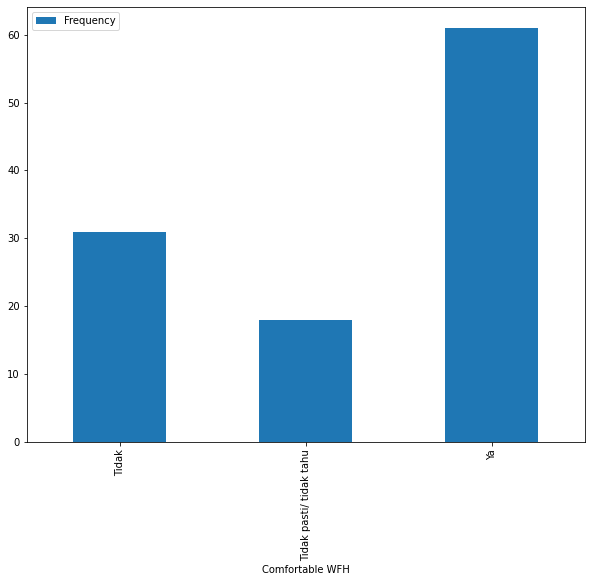

In [14]:
normalized_comfortable_wfh, summary_comfortable_wfh = distribution.distinct(
    df, fields.FIELD_COMFY_WORK_FROM_HOME, "Comfortable WFH"
)

#### Are your family members (if applicable) able to learn online?

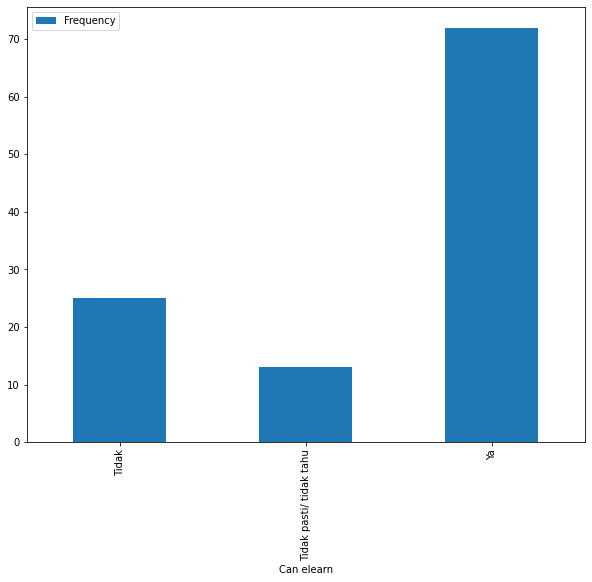

In [15]:
normalized_can_elearn, summary_can_elearn = distribution.distinct(
    df, fields.FIELD_FAMILY_CAN_ELEARN, "Can elearn"
)

#### Are they comfortable with learning online?

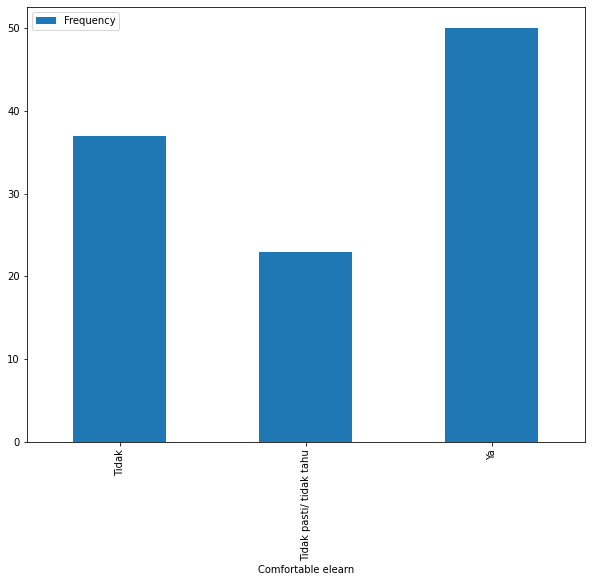

In [16]:
normalized_comfortable_elearn, summary_comfortable_elearn = distribution.distinct(
    df, fields.FIELD_COMFY_ELEARN, "Comfortable elearn"
)

#### How much are you willing to pay monthly for internet access service?

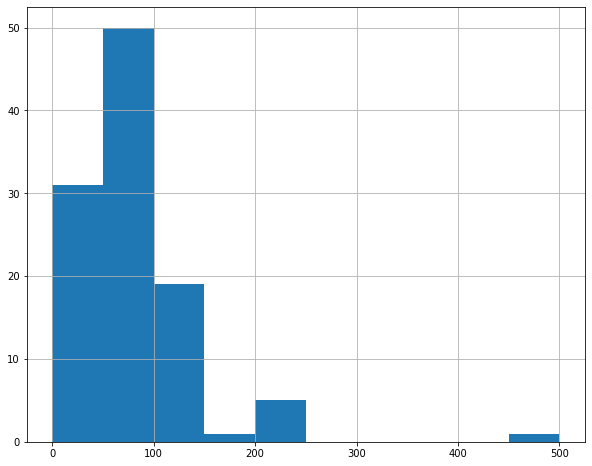

In [17]:
normalized_budget_internet, summary_budget_internet = distribution.number(
    df, fields.FIELD_BUDGET_INTERNET, "budget internet", range(0, 501, 50)
)

#### How much are you willing to pay for a new computer or laptop

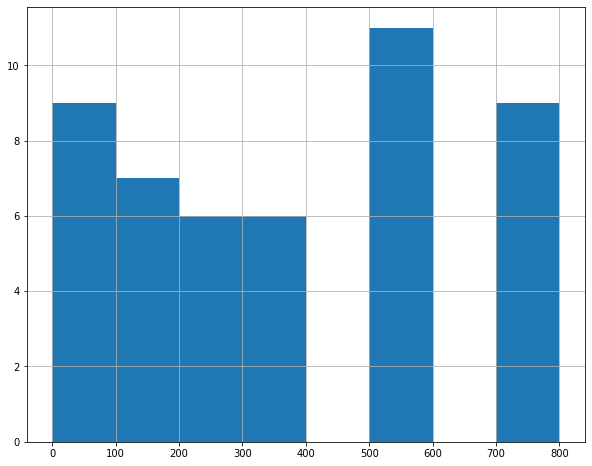

In [18]:
normalized_budget_computer, summary_budget_computer = distribution.number(
    df, fields.FIELD_BUDGET_COMPUTER, "budget computer", range(0, 801, 100)
)

#### How much are you willing to pay for a new smartphone or tablet?

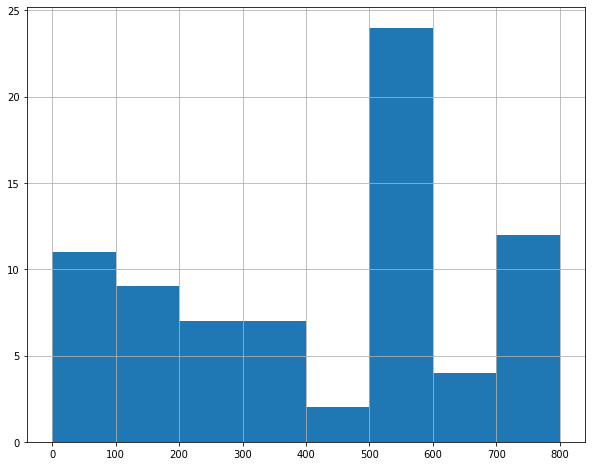

In [19]:
normalized_budget_mobile, summary_budget_mobile = distribution.number(
    df, fields.FIELD_BUDGET_MOBILE, "budget mobile", range(0, 801, 100)
)

#### Which of the following devices/services do you think are essential for the time being?

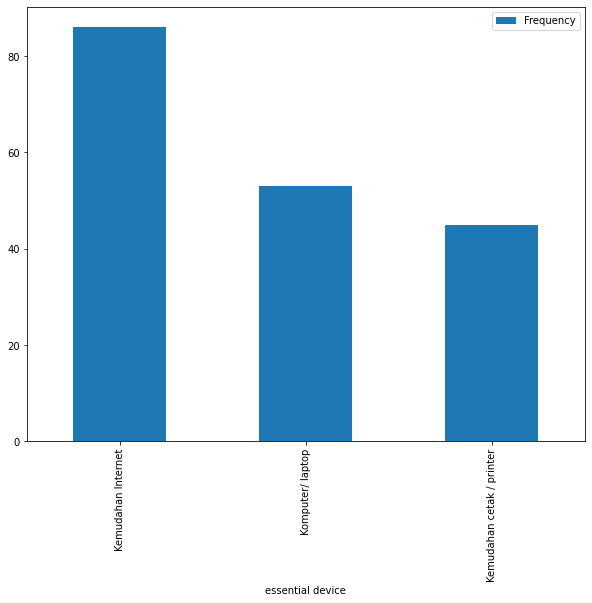

In [20]:
normalized_device_wish, summary_device_wish = distribution.mcq(
    df,
    fields.FIELD_DEVICE_WISH,
    "essential device",
    ("Kemudahan Internet", "Komputer/ laptop", "Kemudahan cetak / printer"),
    lambda x: 'Kemudahan Internet, Komputer/ laptop, Kemudahan cetak / printer' if x == 'semua di atas' else x
)

#### other essential devices/services

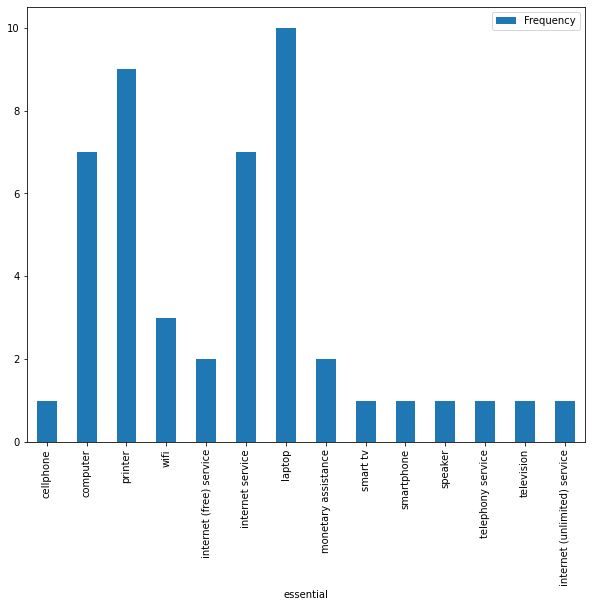

In [21]:
normalized_device_wish_more, summary_device_wish_more = distribution.mcq(
    df,
    fields.FIELD_DEVICE_WISH_MORE,
    "essential",
    (
        "cellphone",
        "computer",
        "printer",
        "wifi",
        "internet (free) service",
        "internet service",
        "laptop",
        "monetary assistance",
        "smart tv",
        "smartphone",
        "speaker",
        "telephony service",
        "television",
        "internet (unlimited) service",
    ),
    preprocessor.essential_wishlist,
)

### Challenges encountered in getting internet access

#### Problem accessing the internet due to device related challenges

In [22]:
normalized_challenge_device, summary_challenge_device = distribution.ranking(
    df,
    [
        fields.FIELD_INTERNET_PROBLEM_DEVICE_EXPENSIVE,
        fields.FIELD_INTERNET_PROBLEM_NO_DEVICE,
        fields.FIELD_INTERNET_PROBLEM_MANY_BATTERIES,
        fields.FIELD_INTERNET_PROBLEM_ACCESS_PROBLEM,
    ],
    ("A", "B", "C", "D"),
)

#### Problem accessing the internet due to service related challenges

In [23]:
normalized_challenge_service, summary_challenge_service = distribution.ranking(
    df,
    [
        fields.FIELD_INTERNET_PROBLEM_SERVICE_EXPENSIVE,
        fields.FIELD_INTERNET_PROBLEM_NO_COVERAGE,
    ],
    ("A", "B", "C", "D"),
)

#### Problem accessing the internet due to technical ability related challenges

In [24]:
normalized_challenge_tech, summary_challenge_tech = distribution.ranking(
    df,
    [
        fields.FIELD_INTERNET_PROBLEM_NO_TIME_LEARN,
        fields.FIELD_INTERNET_PROBLEM_TECHNOLOGY_BARRIER,
        fields.FIELD_INTERNET_PROBLEM_NO_CONFIDENCE_INTERNET,
        fields.FIELD_INTERNET_PROBLEM_NO_INTERNET_SKILL,
        fields.FIELD_INTERNET_PROBLEM_NO_TEACHING,
    ],
    ["A", "B", "C", "D"],
)

#### Problem accessing the internet due to literacy related challenges

In [25]:
normalized_challenge_literacy, summary_challenge_literacy = distribution.ranking(
    df,
    [
        fields.FIELD_INTERNET_PROBLEM_LANGUAGE_BARRIER,
        fields.FIELD_INTERNET_PROBLEM_READ_WRITE_PROBLEM,
    ],
    ["A", "B", "C", "D"],
)

#### Problem accessing the internet due to data privacy concern

In [26]:
normalized_challenge_privacy, summary_challenge_privacy = distribution.ranking(
    df,
    [
        fields.FIELD_INTERNET_PROBLEM_STRANGER_FEAR,
        fields.FIELD_INTERNET_PROBLEM_CONTENT_FEAR,
        fields.FIELD_INTERNET_PROBLEM_IDENTITY_THEFT,
    ],
    ["A", "B", "C", "D"],
)

#### Problem accessing the internet due to other challenges

In [27]:
normalized_challenge_other, summary_challenge_other = distribution.ranking(
    df,
    [
        fields.FIELD_INTERNET_PROBLEM_NO_TIME_ACCESS,
        fields.FIELD_INTERNET_PROBLEM_DISINTERESTED,
        fields.FIELD_INTERNET_PROBLEM_NO_PERMISSION,
    ],
    ["A", "B", "C", "D"],
)

#### What is your goal when accessing the internet

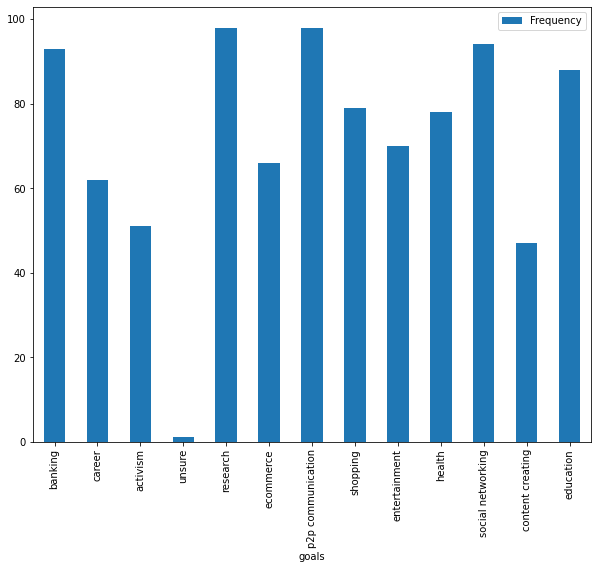

In [28]:
options = (
    (
        "Komunikasi berdasarkan “satu ke satu” (menggunakan mesej segera, chat,  hantar/terima e-mel, panggilan video, panggilan suara)",
        "p2p communication",
    ),
    (
        "Tujuan sosial/ komunikasi ke ramai orang serentak (menhantar mesej ke kumpulan  Whatsapp / Telegram, berkongsi gambar / video / muzik di internet, mengakses media sosial seperti Facebook)",
        "social networking",
    ),
    (
        "Hiburan (spt. bermain online game, mendengar radio atau menonton video / TV / filem /muzik, atau membaca berita hiburan dan gosip)",
        "entertainment",
    ),
    ("Untuk nasihat dan maklumat perubatan / kesihatan", "health"),
    (
        "Mencari maklumat (spt melayari internet, membaca berita atau memeriksa cuaca, membaca maklumat dan artikel sukan terkini, kajian, dan mencari maklumat untuk tujuan peribadi)",
        "research",
    ),
    ("Pendidikan (kursus latihan online, sokongan untuk kerja sekolah)", "education"),
    (
        "Membeli barang (mengkaji barangan atau memesan dan membeli barangan dalam talian)",
        "shopping",
    ),
    ("Perbankan dan perkhidmatan kewangan (menghantar dan menerima wang)", "banking"),
    ("Menyuarakan pendapat terhadap isu yang diambil berat", "activism"),
    (
        "Membuat dan berkongsi / menerbitkan kontent yang boleh dihasilkan sendiri (gambar, blog, video, game, applikasi, kontent social media, article online dan berita)",
        "content creating",
    ),
    ("Mencari kerja / nasihat kerjaya", "career"),
    (
        "Menyokong perusahaan sendiri (pengliklanan, menghubungi pelanggan, membeli barang dan servis online, mengkaji harga barangan)",
        "ecommerce",
    ),
    ("Tidak pasti / tidak tahu", "unsure"),
    ("pendidikan anak home learns", "education"),
)


def goal_preprocess(item):
    return reduce(
        lambda current, incoming: current.replace(incoming[0], incoming[-1]),
        options,
        item,
    )


normalized_goals, summary_goals = distribution.mcq(
    df,
    fields.FIELD_INTERNET_GOAL,
    "goals",
    set(option[-1] for option in options),
    goal_preprocess,
)

#### Frequently accessed web services

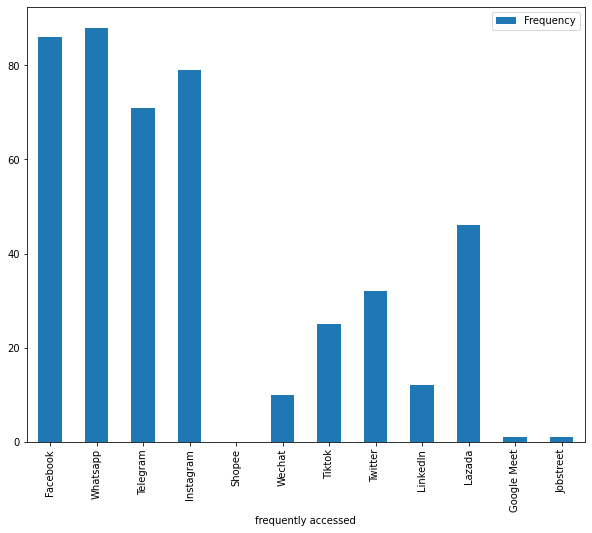

In [29]:
normalized_frequent_web, summary_frequent_web = distribution.mcq(
    df,
    fields.FIELD_MONTHLY_SOCIAL_MEDIA,
    "frequently accessed",
    (
        "Facebook",
        "Whatsapp",
        "Telegram",
        "Instagram",
        "Shopee",
        "Wechat",
        "Tiktok",
        "Twitter",
        "LinkedIn",
        "Lazada",
        "Google Meet",
        "Jobstreet",
    ),
)

#### Type of internet service used

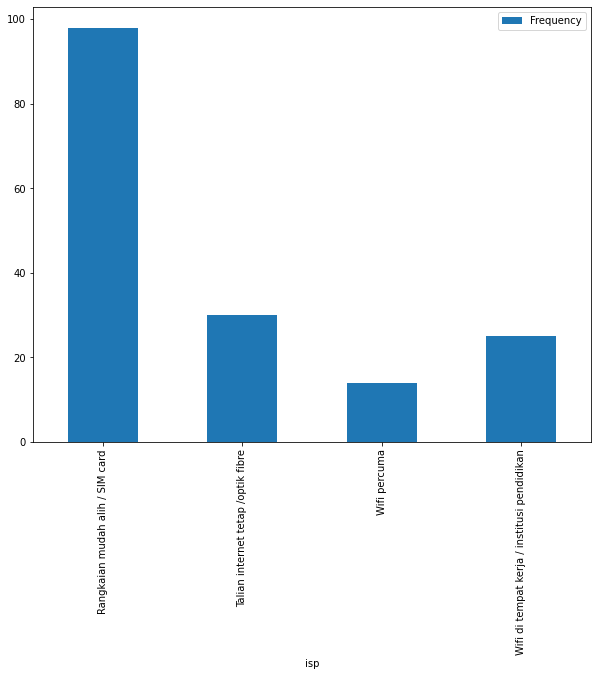

In [30]:
normalized_isp, summary_isp = distribution.mcq(
    df,
    fields.FIELD_ISP_TYPE,
    "isp",
    (
        "Rangkaian mudah alih / SIM card",
        "Talian internet tetap /optik fibre",
        "Wifi percuma",
        "Wifi di tempat kerja / institusi pendidikan",
    ),
)

### How does the Internet change your life?

#### Change in social life

In [31]:
normalized_change_social, summary_change_social = distribution.ranking(
    df,
    [
        fields.FIELD_SOCIAL_BETTER_COMMUNICATION,
        fields.FIELD_SOCIAL_BETTER_ENTERTAINMENT,
        fields.FIELD_SOCIAL_NEGLECT_FAMILY_FRIENDS,
    ],
    ("Sangat Setuju", "Setuju", "Neutral", "Tidak Setuju", "Sangat tidak setuju"),
)

#### Change in personal finances

In [32]:
normalized_change_financial, summary_change_financial = distribution.ranking(
    df,
    [
        fields.FIELD_BUDGETING_MORE_OPPORTUNITIES,
        fields.FIELD_BUDGETING_BETTER_PLAN,
        fields.FIELD_BUDGETING_MORE_INCOME,
        fields.FIELD_BUDGETING_MORE_SPENDING,
    ],
    ("Sangat Setuju", "Setuju", "Neutral", "Tidak Setuju", "Sangat tidak setuju"),
)

#### Change in service access

In [33]:
normalized_change_access, summary_change_access = distribution.ranking(
    df,
    [
        fields.FIELD_ACCESS_FOLLOW_NEWS,
        fields.FIELD_ACCESS_BETTER_HEALTH_SERVICE,
        fields.FIELD_ACCESS_BETTER_OPPORTUNITY,
        fields.FIELD_ACCESS_BETTER_PUBLIC_SERVICE,
    ],
    ("Sangat Setuju", "Setuju", "Neutral", "Tidak Setuju", "Sangat tidak setuju"),
)

#### Change in Social / Self-awareness

In [34]:
normalized_change_awareness, summary_change_awareness = distribution.ranking(
    df,
    [
        fields.FIELD_AWARENESS_MORE_RESPECTED,
        fields.FIELD_AWARENESS_MORE_CONFIDENCE,
        fields.FIELD_AWARENESS_MORE_PROUD,
        fields.FIELD_AWARENESS_MORE_VOICE,
        fields.FIELD_AWARENESS_MORE_CONTROLLED,
        fields.FIELD_AWARENESS_MORE_CONSTRAINED,
    ],
    ("Sangat Setuju", "Setuju", "Neutral", "Tidak Setuju", "Sangat tidak setuju"),
)

#### Your opinion on the use of the internet in a family

In [35]:
normalized_opinion_family, summary_opinion_family = distribution.ranking(
    df,
    [
        fields.FIELD_INTERNET_OPINION_WIFE_CHECK_HUSBAND,
        fields.FIELD_INTERNET_OPINION_HUSBAND_CHECK_WIFE,
        fields.FIELD_INTERNET_OPINION_FEMALE_SAFETY,
    ],
    ("Sangat Setuju", "Setuju", "Neutral", "Tidak Setuju", "Sangat tidak setuju"),
)

#### Your opinion on the use of the internet based on personal experience

In [36]:
normalized_opinion_personal, summary_opinion_personal = distribution.ranking(
    df,
    [
        fields.FIELD_INTERNET_OPINION_INSECURE_WITHOUT,
        fields.FIELD_INTERNET_OPINION_INTERNET_MORE_CONFUSION,
        fields.FIELD_INTERNET_OPINION_INTERNET_FEEL_SAFE,
        fields.FIELD_INTERNET_OPINION_TRUST_INFO,
        fields.FIELD_INTERNET_OPINION_CHANGE_LIFE,
        fields.FIELD_INTERNET_OPINION_WASTE_TIME,
        fields.FIELD_INTERNET_OPINION_SELECTED_NEED,
    ],
    ("Sangat Setuju", "Setuju", "Neutral", "Tidak Setuju", "Sangat tidak setuju"),
)

#### What makes you worried about the internet?

In [37]:
normalized_challenge_tech, summary_challenge_tech = distribution.ranking(
    df,
    [
        fields.FIELD_INTERNET_PROBLEM_STRANGER_FEAR,
        fields.FIELD_INTERNET_PROBLEM_CONTENT_FEAR,
        fields.FIELD_INTERNET_PROBLEM_IDENTITY_THEFT,
    ],
    ['A', 'B', 'C', 'D']
)

#### Have you experienced the following while using the internet?

In [38]:
normalized_experience_harassment, summary_experience_harassment = distribution.ranking(
    df,
    [
        fields.FIELD_EXPERIENCE_HARASSMENT,
        fields.FIELD_EXPERIENCE_THREAT,
        fields.FIELD_EXPERIENCE_INAPPROPRIATE,
        fields.FIELD_EXPERIENCE_DOXX,
    ],
    (
        "Sentiasa",
        "Sering kali",
        "Kadang kala",
        "Tidak pernah",
        "Tidak pasti/tidak tahu",
    ),
)

#### Do you agree with the following

In [39]:
normalized_opinion_personal, summary_opinion_personal = distribution.ranking(
    df,
    [
        fields.FIELD_AGREE_ON_PRIVACY,
        fields.FIELD_AGREE_ON_INAPPROPRIATE,
        fields.FIELD_AGREE_ON_STRANGER,
    ],
    ("Sangat Setuju", "Setuju", "Neutral", "Tidak Setuju", "Sangat tidak setuju"),
)

#### Your family does not like you to access the internet

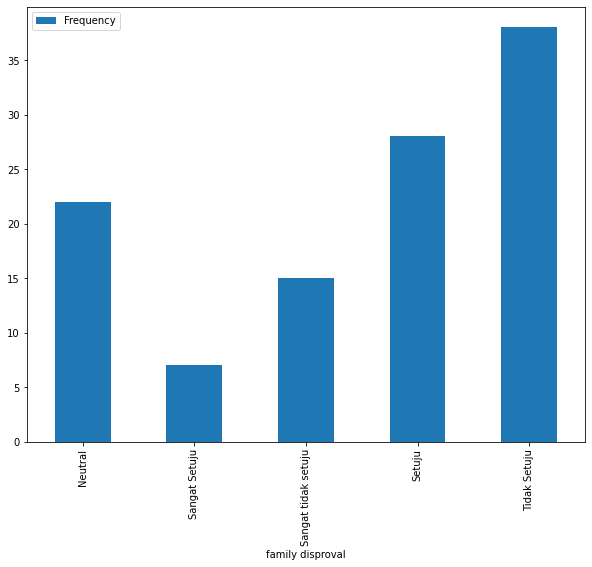

In [40]:
normalized_family_permission, summary_family_permission = distribution.distinct(
    df, fields.FIELD_AGREE_ON_FAMILY_DISPROVAL, "family disproval"
)

## Correlation study

This is the part where I start calculating correlation.

### vs Household income

#### Correlation between household income and the methods used to access government service

```
We fail to reject the hypothesis where there household income is independent from the method used to access the government service at alpha value being set to 0.05 (Which means the same conclusion can be drawn 95% of the time should this study is repeated). Therefore no further study was conducted to test for correlation between the two factors.
```

Failed to reject H_0 at alpha=0.05 since test statistic chi2=19.30038826772428 < 32.670573340917315


True

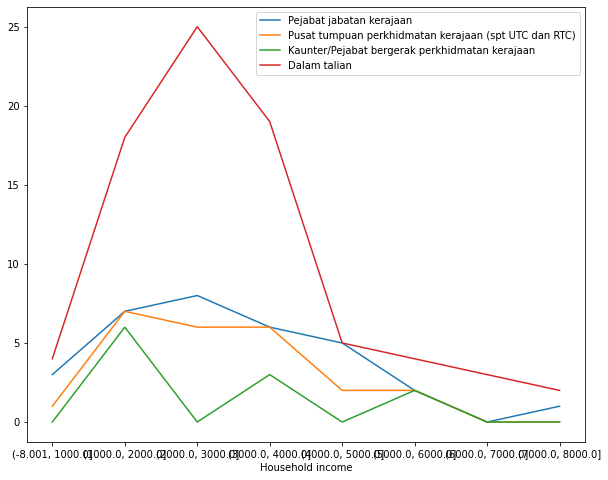

In [41]:
income_vs_public_access_method = relation.interval_vs_mcq(
    normalized_income,
    normalized_public_access_method,
    summary_income.index,
)

relation.independence_check(income_vs_public_access_method, 0.05)

#### Correlation between household income vs the ownership of different types of devices

```
We fail to reject the hypothesis where there household income is independent from the ownership of different types of devices at alpha value being set to 0.05.
```

Failed to reject H_0 at alpha=0.05 since test statistic chi2=37.978699912975614 < 58.12403768086803


True

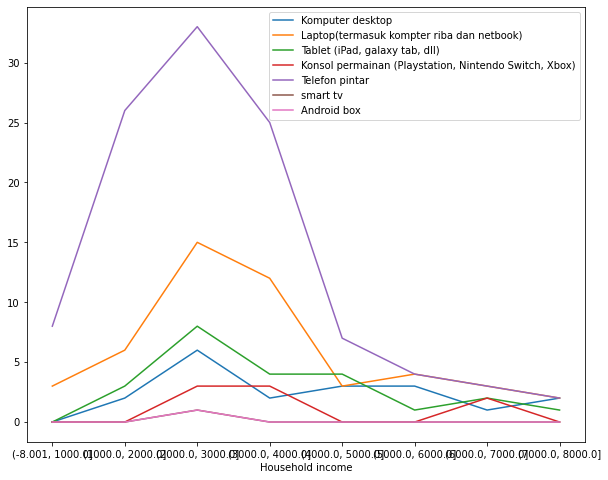

In [42]:
income_vs_ownership = relation.interval_vs_mcq(
    normalized_income,
    normalized_owned_devices,
    summary_income.index
)

relation.independence_check(income_vs_ownership, 0.05)

#### Household income vs whether respondents get to access the internet as much as they desire

```
We fail to reject the hypothesis where there household income is independent from whether respondents get to access the internet as much as he/she desires at alpha value being set to 0.05.
```

Failed to reject H_0 at alpha=0.05 since test statistic chi2=19.509733775665147 < 23.684791304840576


True

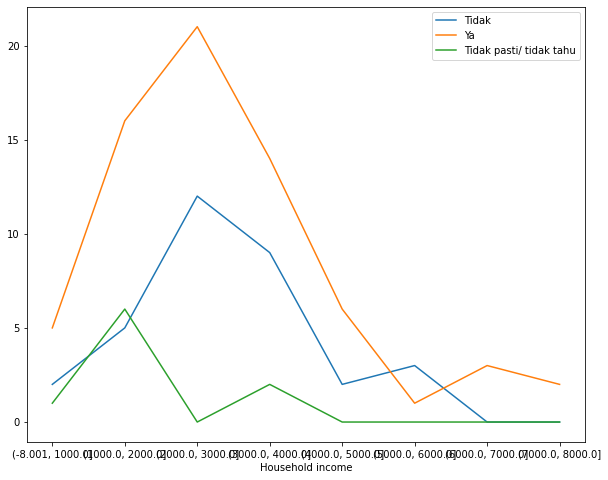

In [43]:
income_vs_sufficient_usage = relation.interval_vs_distinct(
    normalized_income,
    normalized_sufficient_usage,
    summary_income.index
)

relation.independence_check(income_vs_sufficient_usage, 0.05)

#### Household income vs prior experience in usage of public wifi

```
We fail to reject the hypothesis where there household income is independent from whether respondents used public wifi at alpha value being set to 0.05.
```

Failed to reject H_0 at alpha=0.05 since test statistic chi2=22.836703334388524 < 23.684791304840576


True

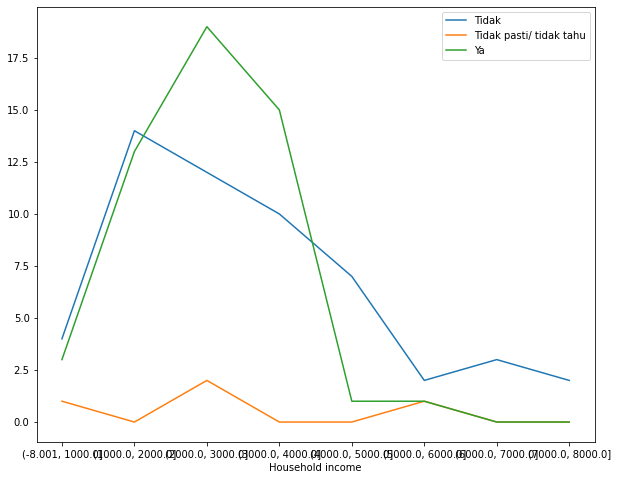

In [44]:
income_vs_used_public_wifi = relation.interval_vs_distinct(
    normalized_income,
    normalized_used_public_wifi,
    summary_income.index
)

relation.independence_check(income_vs_used_public_wifi, 0.05)

#### Household income vs prior experience in usage of public wifi provided by the government

```
We fail to reject the hypothesis where there household income is independent from whether respondents used public wifi provided by the government at alpha value being set to 0.05.
```

Failed to reject H_0 at alpha=0.05 since test statistic chi2=13.74350347546426 < 23.684791304840576


True

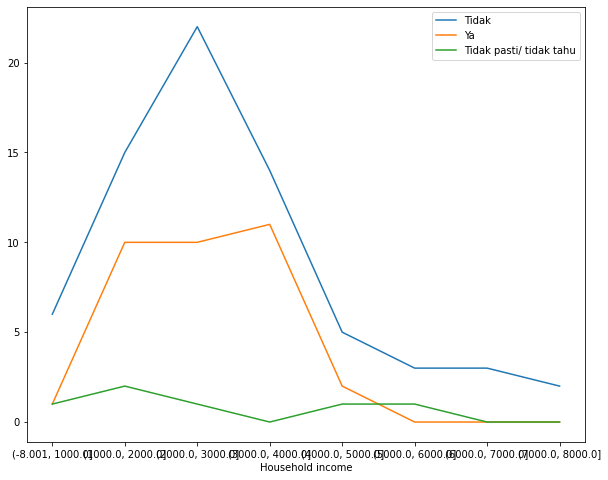

In [45]:
income_vs_used_selangor_wifi = relation.interval_vs_distinct(
    normalized_income,
    normalized_used_selangor_wifi,
    summary_income.index
)

relation.independence_check(income_vs_used_selangor_wifi, 0.05)

#### Household income vs ability to work from home

```
We fail to reject the hypothesis where there household income is independent from whether respondents could work from home provided by the government at alpha value being set to 0.05.
```

Failed to reject H_0 at alpha=0.05 since test statistic chi2=10.768244887120556 < 23.684791304840576


True

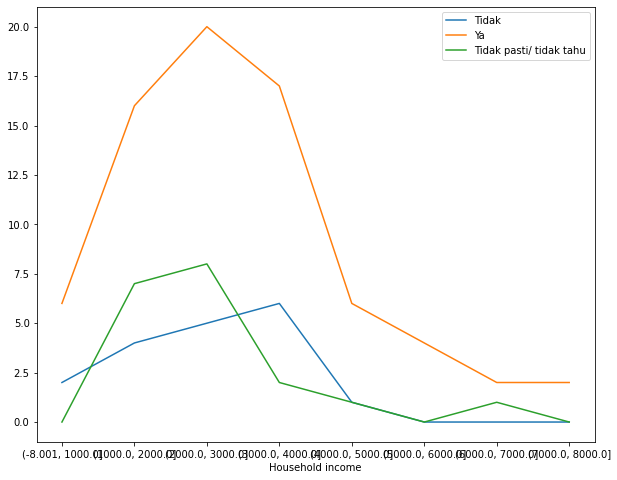

In [46]:
income_vs_wfh = relation.interval_vs_distinct(
    normalized_income,
    normalized_wfh,
    summary_income.index
)

relation.independence_check(income_vs_wfh, 0.05)

#### Household income vs Comfortable working from home

```
We fail to reject the hypothesis where there household income is independent from whether respondents could work from home comfortably provided by the government at alpha value being set to 0.05.
```

Failed to reject H_0 at alpha=0.05 since test statistic chi2=20.263573609451747 < 23.684791304840576


True

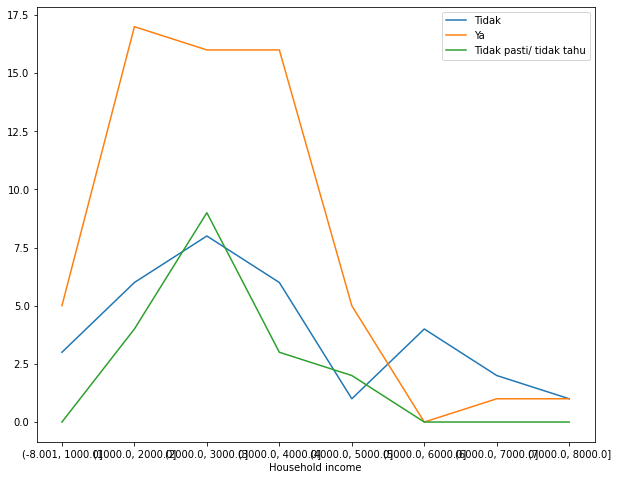

In [47]:
income_vs_comfortable_wfh = relation.interval_vs_distinct(
    normalized_income,
    normalized_comfortable_wfh,
    summary_income.index
)

relation.independence_check(income_vs_comfortable_wfh, 0.05)

#### Household income vs can e-learn

Failed to reject H_0 at alpha=0.05 since test statistic chi2=14.751114988920545 < 23.684791304840576


True

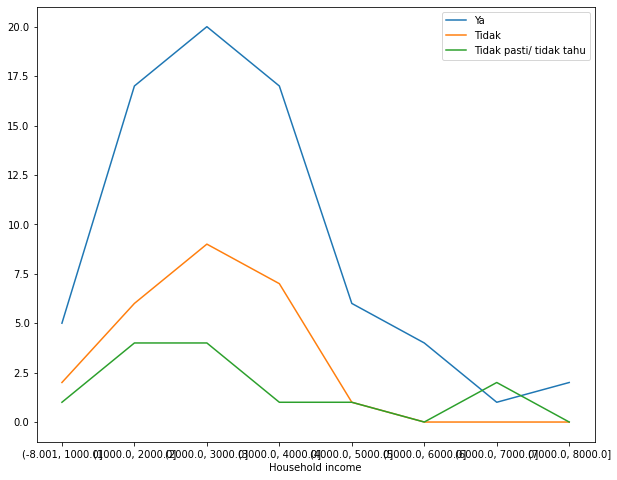

In [48]:
income_vs_can_elearn = relation.interval_vs_distinct(
    normalized_income,
    normalized_can_elearn,
    summary_income.index
)

relation.independence_check(income_vs_can_elearn, 0.05)

#### Household income vs comfortable e-learn

Failed to reject H_0 at alpha=0.05 since test statistic chi2=16.919992557775167 < 23.684791304840576


True

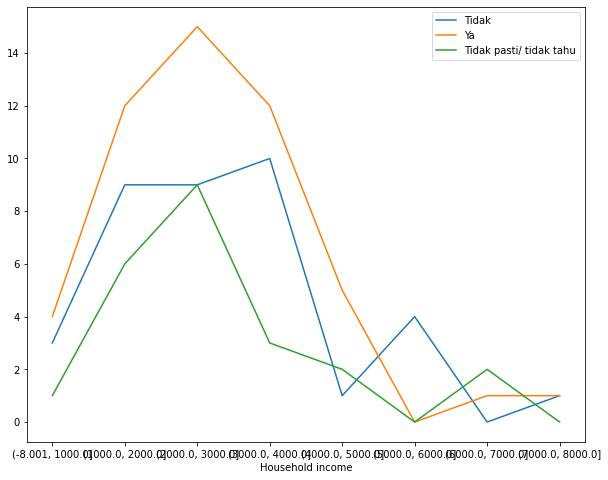

In [49]:
income_vs_comfortable_elearn = relation.interval_vs_distinct(
    normalized_income,
    normalized_comfortable_elearn,
    summary_income.index
)

relation.independence_check(income_vs_comfortable_elearn, 0.05)

#### Household income vs budget for internet access

H_0 is rejected at alpha=0.05 since test statistic chi2=64.99069264548768 >= 41.33713815142739
The negative correlation is high at rs=-0.7856457858243782.
Failed to reject H_0 at alpha=0.05 since test statistic T=-2.1994988691951067 and critical region=±3.182446305284263. 
Hence, for budget internet at (-0.001, 50.0], the correlation IS NOT significant.

The negative correlation is some at rs=-0.45420146992971866.
Failed to reject H_0 at alpha=0.05 since test statistic T=-0.8830406415531037 and critical region=±3.182446305284263. 
Hence, for budget internet at (50.0, 100.0], the correlation IS NOT significant.

The correlation is very low at rs=0.06234796863885497.
Failed to reject H_0 at alpha=0.05 since test statistic T=0.10820035616009188 and critical region=±3.182446305284263. 
Hence, for budget internet at (100.0, 150.0], the correlation IS NOT significant.

The correlation is some at rs=0.495558504409436.
Failed to reject H_0 at alpha=0.05 since test statistic T=0.988208204461587

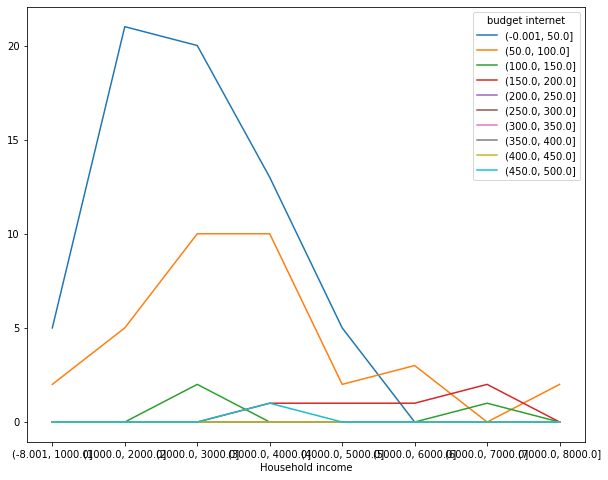

In [50]:
income_vs_budget_internet = relation.interval_vs_interval(
    normalized_income,
    normalized_budget_internet,
    summary_income.index,
    summary_budget_internet.index,
)

relation.independence_check(income_vs_budget_internet, 0.05)

relation.correlation_check(income_vs_budget_internet, alpha=0.05, method="spearman")

#### Household income vs Budget for computer / laptop

Failed to reject H_0 at alpha=0.05 since test statistic chi2=32.17702297702297 < 37.65248413348277


True

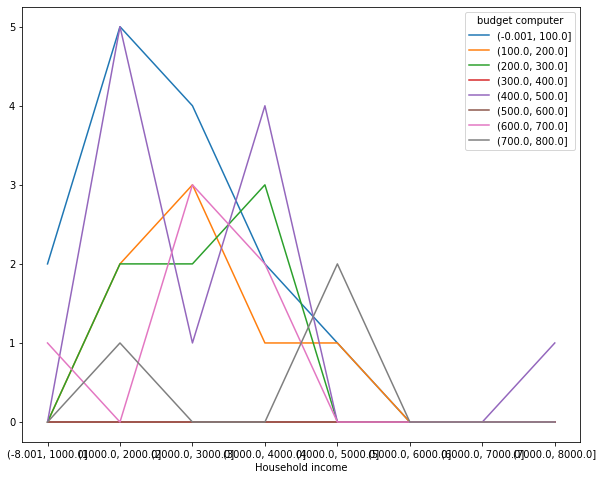

In [51]:
income_vs_budget_computer = relation.interval_vs_interval(
    normalized_income,
    normalized_budget_computer,
    summary_income.index,
    summary_budget_computer.index,
)

relation.independence_check(income_vs_budget_computer, 0.05)

#### Household income vs budget for mobile devices

Failed to reject H_0 at alpha=0.05 since test statistic chi2=39.14368833672451 < 58.12403768086803


True

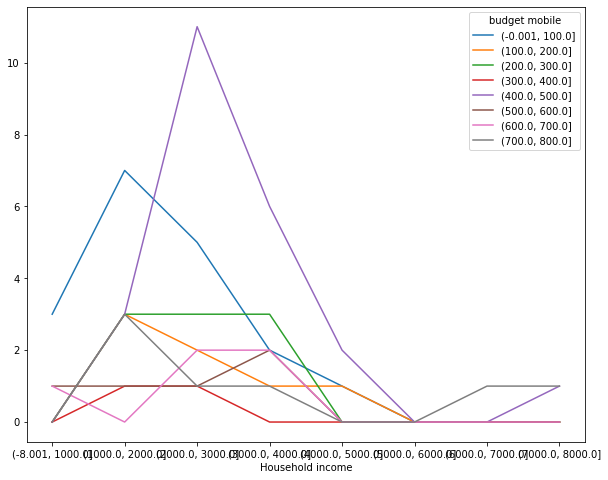

In [52]:
income_vs_budget_mobile = relation.interval_vs_interval(
    normalized_income,
    normalized_budget_mobile,
    summary_income.index,
    summary_budget_mobile.index,
)

relation.independence_check(income_vs_budget_mobile, 0.05)

### vs Education level

In [53]:
ranked_edulevel = pd.Series(
    [
        "Sekolah rendah",
        "Sekolah menengah",
        "Institusi pengajian tinggi",
    ],
    name=fields.FIELD_EDUCATION_LEVEL,
)


#### Correlation between education level and the methods used to access government service

Failed to reject H_0 at alpha=0.05 since test statistic chi2=0.9913523976023976 < 7.814727903251179


True

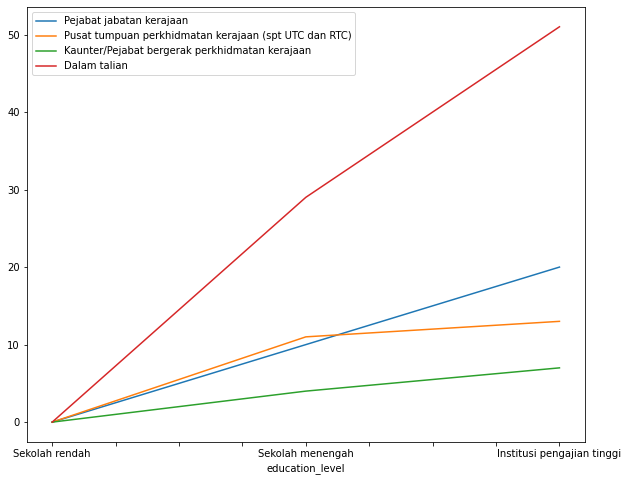

In [54]:
edulevel_vs_public_access_method = relation.distinct_vs_mcq(
    normalized_edulevel,
    normalized_public_access_method,
    ranked_edulevel
)

relation.independence_check(edulevel_vs_public_access_method, 0.05)

#### Correlation between education level vs the ownership of different types of devices

H_0 is rejected at alpha=0.05 since test statistic chi2=15.773935788362264 >= 12.591587243743977
The negative correlation is very high at rs=-0.9999999999999999.
H_0 is rejected at alpha=0.05 since test statistic T=-134217727.99999999, and critical region=±2.7764451051977987. 
Hence, for None at Komputer desktop, the correlation IS significant.

The negative correlation is very high at rs=-0.9999999999999999.
H_0 is rejected at alpha=0.05 since test statistic T=-134217727.99999999, and critical region=±2.7764451051977987. 
Hence, for None at Laptop(termasuk kompter riba dan netbook), the correlation IS significant.

The negative correlation is very high at rs=-0.9999999999999999.
H_0 is rejected at alpha=0.05 since test statistic T=-134217727.99999999, and critical region=±2.7764451051977987. 
Hence, for None at Tablet (iPad, galaxy tab, dll), the correlation IS significant.

The negative correlation is very high at rs=-0.9999999999999999.
H_0 is rejected at alpha=0.05 since test stati

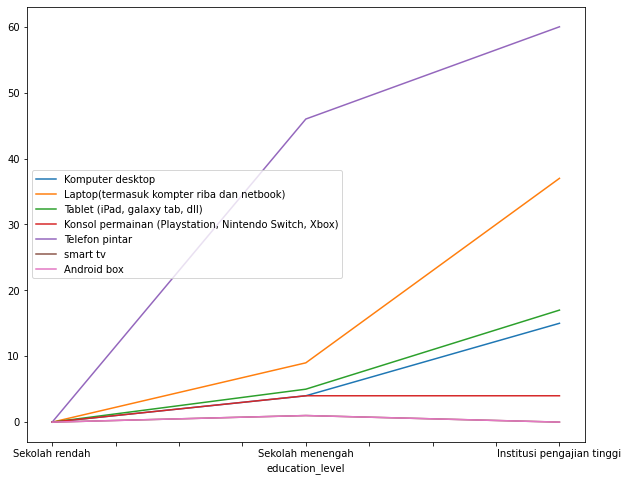

In [55]:
edulevel_vs_ownership = relation.distinct_vs_mcq(
    normalized_edulevel, normalized_owned_devices, ranked_edulevel
)

relation.independence_check(edulevel_vs_ownership, 0.05) or relation.correlation_check(
    edulevel_vs_ownership, alpha=0.05, method="spearman"
)

#### Education level vs whether respondents get to access the internet as much as they desire

Failed to reject H_0 at alpha=0.05 since test statistic chi2=1.045203004857124 < 5.991464547107979


True

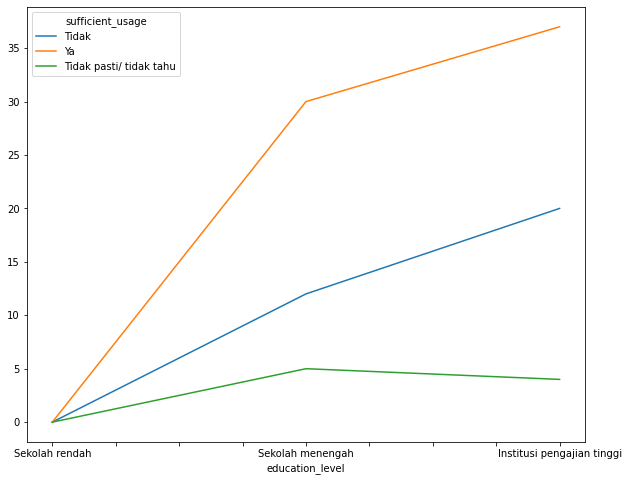

In [56]:
edulevel_vs_sufficient_usage = relation.distinct_vs_distinct(
    normalized_edulevel, normalized_sufficient_usage, ranked_edulevel
)

relation.independence_check(edulevel_vs_sufficient_usage, 0.05) 

#### Education level vs prior experience in usage of public wifi

Failed to reject H_0 at alpha=0.05 since test statistic chi2=1.8635589568928366 < 5.991464547107979


True

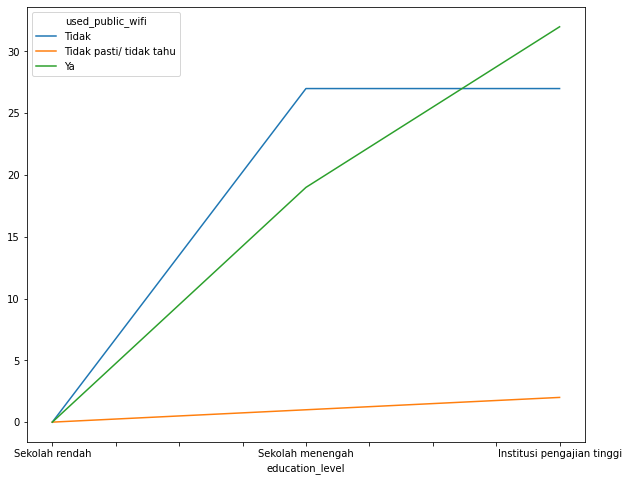

In [57]:
edulevel_vs_used_public_wifi = relation.distinct_vs_distinct(
    normalized_edulevel, normalized_used_public_wifi, ranked_edulevel
)

relation.independence_check(
    edulevel_vs_used_public_wifi, 0.05
) or relation.correlation_check(
    edulevel_vs_used_public_wifi, alpha=0.05, method="spearman"
)

#### Education level vs prior experience in usage of public wifi provided by the government

H_0 is rejected at alpha=0.05 since test statistic chi2=6.14834758701406 >= 5.991464547107979
The correlation is very high at rs=0.9999999999999999.
H_0 is rejected at alpha=0.05 since test statistic T=67108863.99999999, and critical region=±12.706204736432095. 
Hence, for used_selangor_wifi at Tidak, the correlation IS significant.

The negative correlation is very high at rs=-0.9999999999999999.
H_0 is rejected at alpha=0.05 since test statistic T=-67108863.99999999, and critical region=±12.706204736432095. 
Hence, for used_selangor_wifi at Ya, the correlation IS significant.

The negative correlation is very high at rs=-0.9999999999999999.
H_0 is rejected at alpha=0.05 since test statistic T=-67108863.99999999, and critical region=±12.706204736432095. 
Hence, for used_selangor_wifi at Tidak pasti/ tidak tahu, the correlation IS significant.



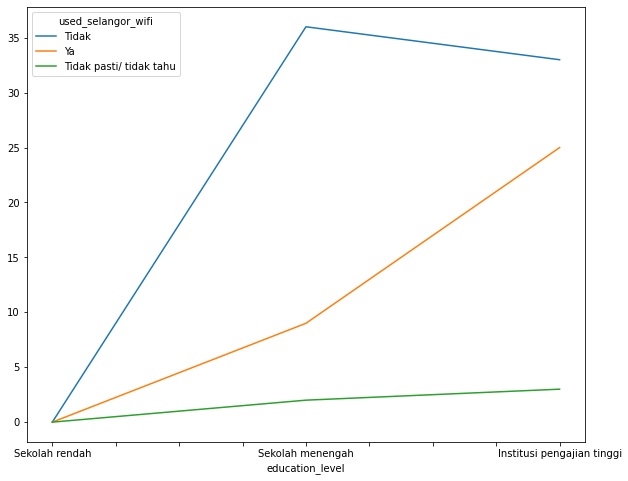

In [58]:
edulevel_vs_used_selangor_wifi = relation.distinct_vs_distinct(
    normalized_edulevel, normalized_used_selangor_wifi, ranked_edulevel
)

relation.independence_check(
    edulevel_vs_used_selangor_wifi, 0.05
) or relation.correlation_check(
    edulevel_vs_used_selangor_wifi, alpha=0.05, method="spearman"
)


#### Education level vs ability to work from home

Failed to reject H_0 at alpha=0.05 since test statistic chi2=2.466583116611911 < 5.991464547107979


True

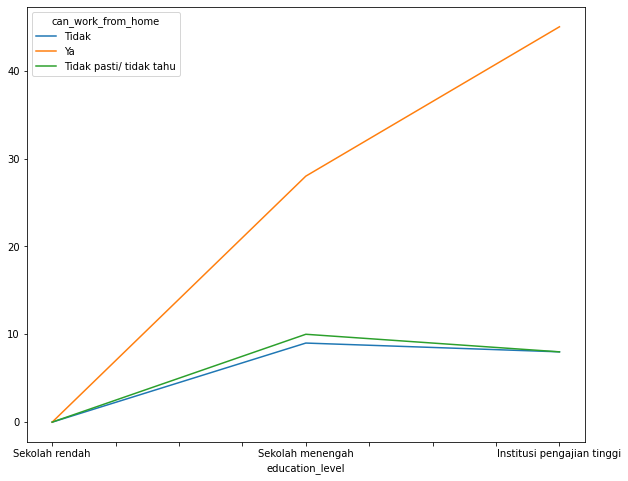

In [59]:
edulevel_vs_wfh = relation.distinct_vs_distinct(
    normalized_edulevel,
    normalized_wfh,
    ranked_edulevel
)

relation.independence_check(edulevel_vs_wfh, 0.05)

#### Education level vs Comfortable working from home

Failed to reject H_0 at alpha=0.05 since test statistic chi2=0.3671175908880996 < 5.991464547107979


True

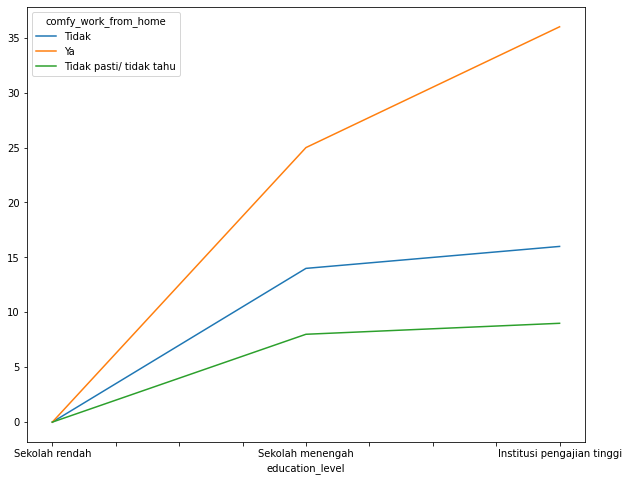

In [60]:
edulevel_vs_comfortable_wfh = relation.distinct_vs_distinct(
    normalized_edulevel,
    normalized_comfortable_wfh,
    ranked_edulevel
)

relation.independence_check(edulevel_vs_comfortable_wfh, 0.05)

#### Education level vs can e-learn

Failed to reject H_0 at alpha=0.05 since test statistic chi2=2.279037321241716 < 5.991464547107979


True

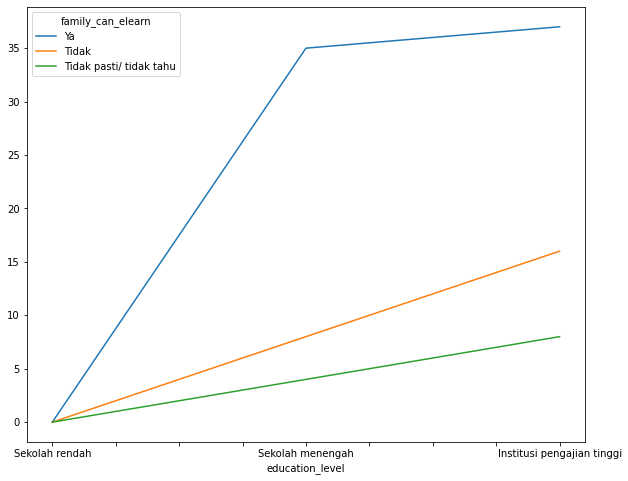

In [61]:
edulevel_vs_can_elearn = relation.distinct_vs_distinct(
    normalized_edulevel,
    normalized_can_elearn,
    ranked_edulevel
)

relation.independence_check(edulevel_vs_can_elearn, 0.05)

#### Education level vs comfortable e-learn

Failed to reject H_0 at alpha=0.05 since test statistic chi2=1.719123569141009 < 5.991464547107979


True

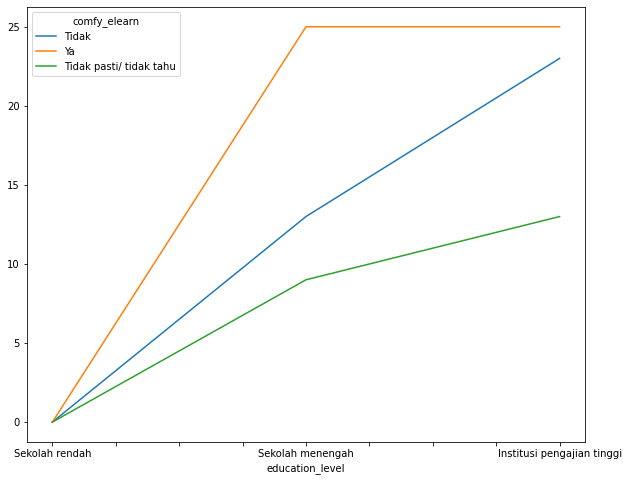

In [62]:
edulevel_vs_comfortable_elearn = relation.distinct_vs_distinct(
    normalized_edulevel, normalized_comfortable_elearn, ranked_edulevel
)

relation.independence_check(
    edulevel_vs_comfortable_elearn, 0.05
) or relation.correlation_check(
    edulevel_vs_comfortable_elearn, alpha=0.05, method="spearman"
)

#### Education level vs budget for internet access

Failed to reject H_0 at alpha=0.05 since test statistic chi2=1.4299982822515775 < 9.487729036781154


True

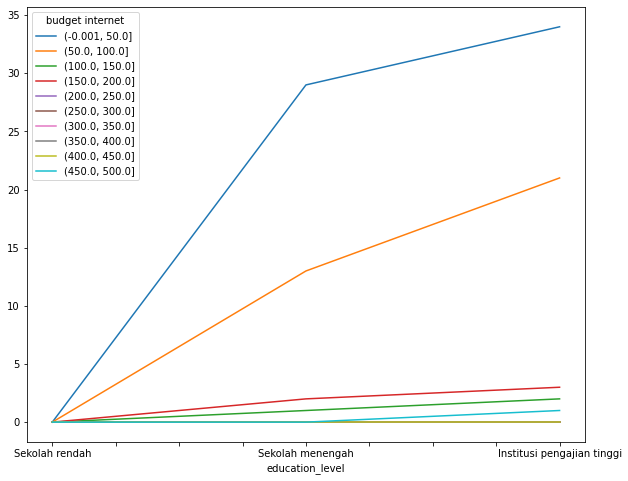

In [63]:
edulevel_vs_budget_internet = relation.distinct_vs_interval(
    normalized_edulevel,
    normalized_budget_internet,
    ranked_edulevel,
    summary_budget_internet.index,
)

relation.independence_check(
    edulevel_vs_budget_internet, 0.05
) or relation.correlation_check(
    edulevel_vs_budget_internet, alpha=0.05, method="spearman"
)

#### Education level vs Budget for computer / laptop

Failed to reject H_0 at alpha=0.05 since test statistic chi2=7.288627893845285 < 11.070497693516351


True

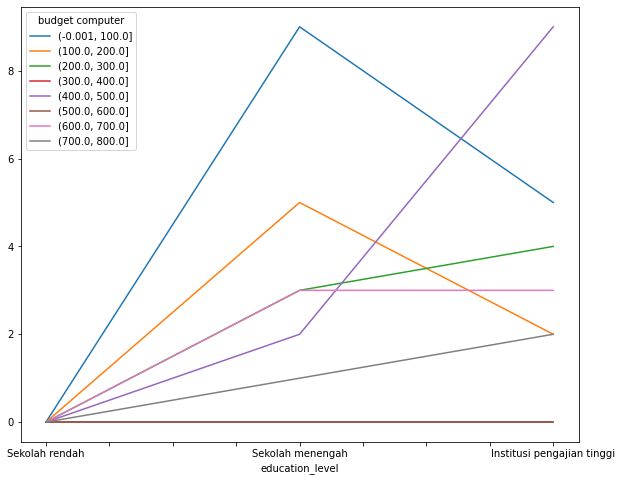

In [64]:
edulevel_vs_budget_computer = relation.distinct_vs_interval(
    normalized_edulevel,
    normalized_budget_computer,
    ranked_edulevel,
    summary_budget_computer.index,
)

relation.independence_check(
    edulevel_vs_budget_computer, 0.05
) or relation.correlation_check(edulevel_vs_budget_computer, 0.05, method="spearman")


#### Education level vs budget for mobile devices

Failed to reject H_0 at alpha=0.05 since test statistic chi2=7.662675504984604 < 14.067140449340169


True

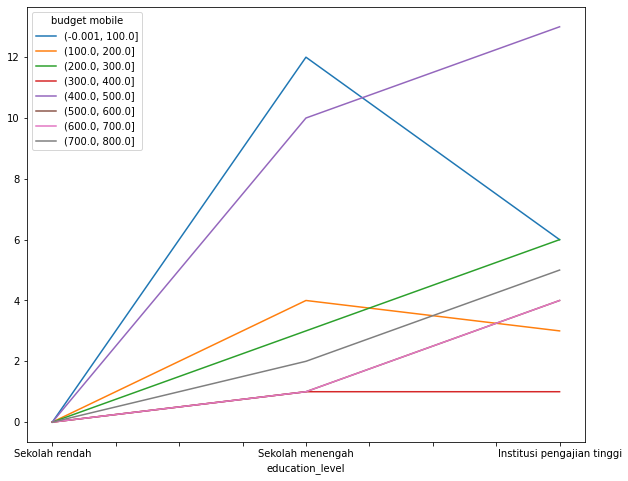

In [65]:
edulevel_vs_budget_mobile = relation.distinct_vs_interval(
    normalized_edulevel,
    normalized_budget_mobile,
    ranked_edulevel,
    summary_budget_mobile.index,
)

relation.independence_check(
    edulevel_vs_budget_mobile, 0.05
) or relation.correlation_check(edulevel_vs_budget_mobile, 0.05, method="spearman")


### vs Age

#### Age vs method used to access government service

Failed to reject H_0 at alpha=0.05 since test statistic chi2=17.737781986531985 < 24.995790139728616


True

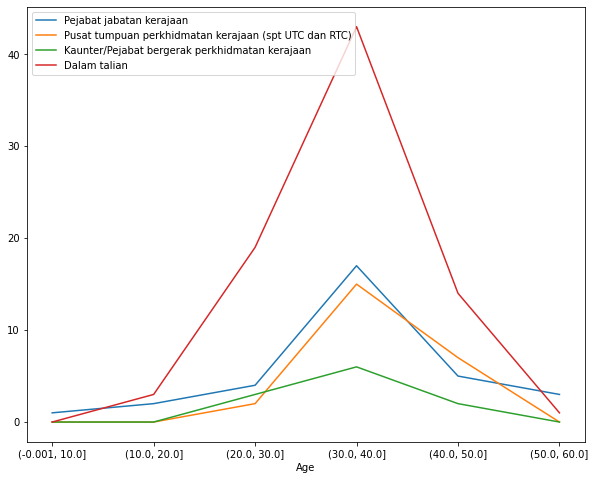

In [66]:
age_vs_public_access_method = relation.interval_vs_mcq(
    normalized_age, normalized_public_access_method, summary_age.index
)

relation.independence_check(
    age_vs_public_access_method, 0.05
) or relation.correlation_check(age_vs_public_access_method, 0.05, method="spearman")


#### Age vs the ownership of different types of device

Failed to reject H_0 at alpha=0.05 since test statistic chi2=17.345951085437612 < 43.77297182574219


True

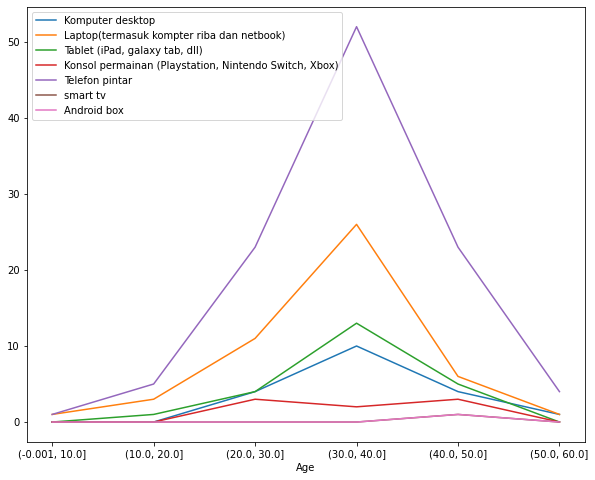

In [67]:
age_vs_ownership = relation.interval_vs_mcq(
    normalized_age, normalized_owned_devices, summary_age.index
)

relation.independence_check(age_vs_ownership, 0.05) or relation.correlation_check(
    age_vs_ownership, alpha=0.05, method="spearman"
)

#### Age vs whether respondents get to access the internet as much as he/she desires

Failed to reject H_0 at alpha=0.05 since test statistic chi2=1.045203004857124 < 5.991464547107979


True

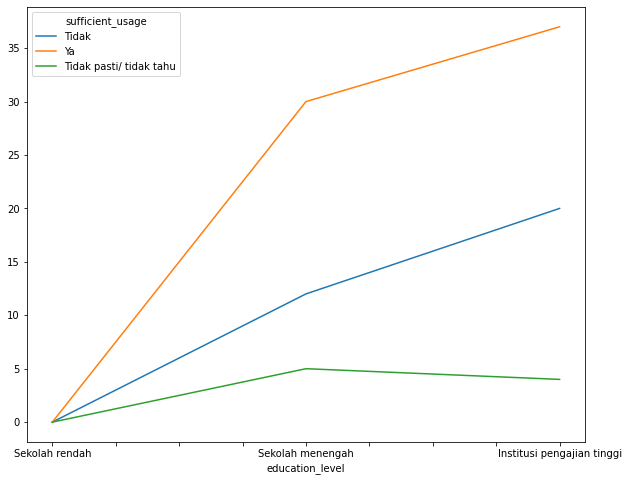

In [68]:
age_vs_sufficient_usage = relation.distinct_vs_distinct(
    normalized_edulevel, normalized_sufficient_usage, ranked_edulevel
)

relation.independence_check(
    age_vs_sufficient_usage, 0.05
) or relation.correlation_check(age_vs_sufficient_usage, 0.05, method="spearman")


#### Age vs prior experience in usage of public wifi

H_0 is rejected at alpha=0.05 since test statistic chi2=31.10420391521704 >= 18.307038053275146
The correlation is high at rs=0.6.
Failed to reject H_0 at alpha=0.05 since test statistic T=0.75 and critical region=±12.706204736432095. 
Hence, for None at Tidak, the correlation IS NOT significant.

The negative correlation is very low at rs=-0.030860669992418384.
Failed to reject H_0 at alpha=0.05 since test statistic T=-0.030875376054721928 and critical region=±12.706204736432095. 
Hence, for None at Tidak pasti/ tidak tahu, the correlation IS NOT significant.

The correlation is low at rs=0.2571428571428572.
Failed to reject H_0 at alpha=0.05 since test statistic T=0.2660905781950872 and critical region=±12.706204736432095. 
Hence, for None at Ya, the correlation IS NOT significant.



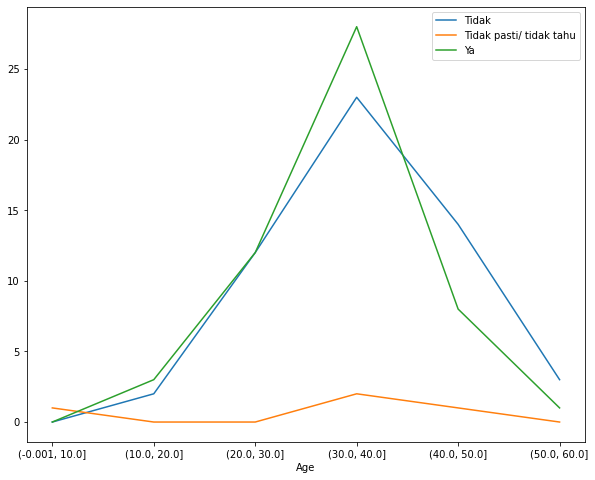

In [69]:
age_vs_used_public_wifi = relation.interval_vs_distinct(
    normalized_age, normalized_used_public_wifi, summary_age.index
)

relation.independence_check(
    age_vs_used_public_wifi, 0.05
) or relation.correlation_check(
    age_vs_used_public_wifi, alpha=0.05, method="spearman"
)


#### Age vs prior experience in usage of public wifi provided by the government

H_0 is rejected at alpha=0.05 since test statistic chi2=22.86787290251074 >= 18.307038053275146
The correlation is high at rs=0.6.
Failed to reject H_0 at alpha=0.05 since test statistic T=0.75 and critical region=±12.706204736432095. 
Hence, for None at Tidak, the correlation IS NOT significant.

The correlation is very low at rs=0.11595420713048969.
Failed to reject H_0 at alpha=0.05 since test statistic T=0.1167416810835558 and critical region=±12.706204736432095. 
Hence, for None at Ya, the correlation IS NOT significant.

The negative correlation is very low at rs=-0.11952286093343938.
Failed to reject H_0 at alpha=0.05 since test statistic T=-0.12038585308576918 and critical region=±12.706204736432095. 
Hence, for None at Tidak pasti/ tidak tahu, the correlation IS NOT significant.



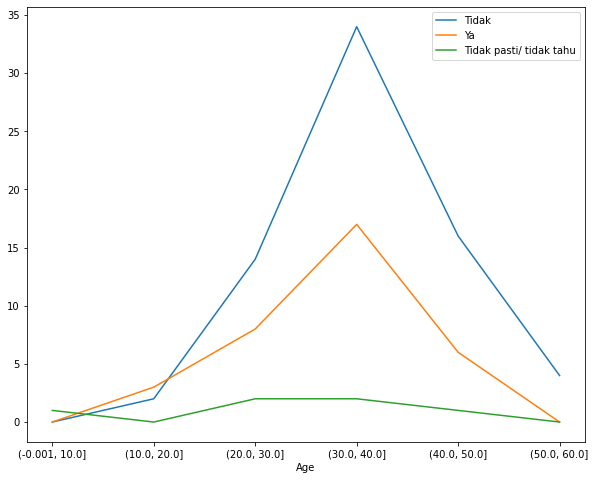

In [70]:
age_vs_used_selangor_wifi = relation.interval_vs_distinct(
    normalized_age, normalized_used_selangor_wifi, summary_age.index
)

relation.independence_check(
    age_vs_used_selangor_wifi, 0.05
) or relation.correlation_check(
    age_vs_used_selangor_wifi, alpha=0.05, method="spearman"
)


#### Age vs ability to work from home

H_0 is rejected at alpha=0.05 since test statistic chi2=22.409321369433226 >= 18.307038053275146
The correlation is some at rs=0.5797710356524484.
Failed to reject H_0 at alpha=0.05 since test statistic T=0.7115680669648199 and critical region=±12.706204736432095. 
Hence, for None at Tidak, the correlation IS NOT significant.

The correlation is low at rs=0.3768511731740915.
Failed to reject H_0 at alpha=0.05 since test statistic T=0.4068464035508638 and critical region=±12.706204736432095. 
Hence, for None at Ya, the correlation IS NOT significant.

The correlation is low at rs=0.20597146021777488.
Failed to reject H_0 at alpha=0.05 since test statistic T=0.21048467276349228 and critical region=±12.706204736432095. 
Hence, for None at Tidak pasti/ tidak tahu, the correlation IS NOT significant.



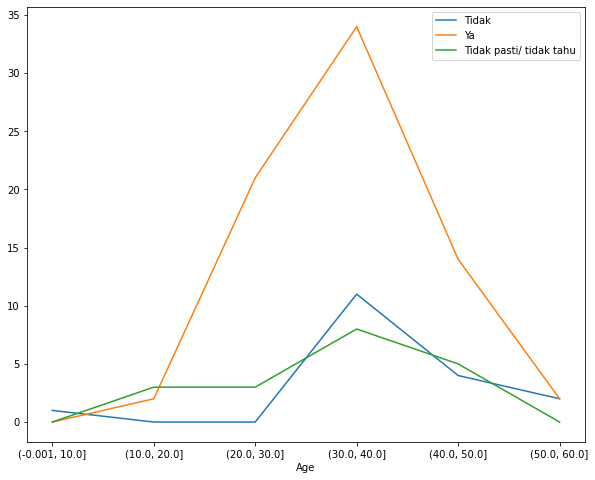

In [71]:
age_vs_wfh = relation.interval_vs_distinct(
    normalized_age, normalized_wfh, summary_age.index
)

relation.independence_check(age_vs_wfh, 0.05) or relation.correlation_check(
    age_vs_wfh, 0.05, method="spearman"
)


#### Age vs being comfortable working from home

Failed to reject H_0 at alpha=0.05 since test statistic chi2=11.957605682644932 < 18.307038053275146


True

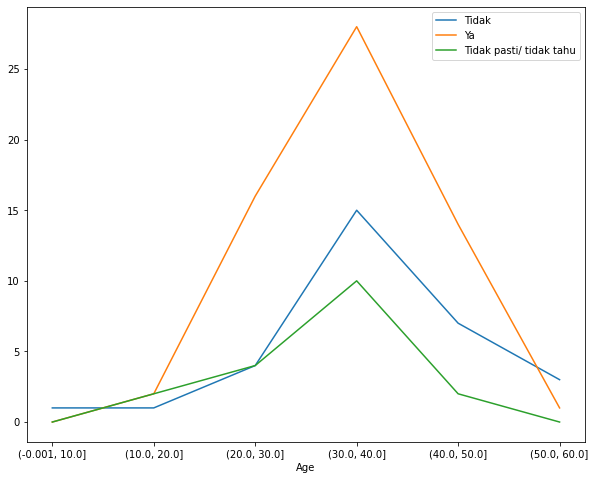

In [72]:
age_vs_comfortable_wfh = relation.interval_vs_distinct(
    normalized_age, normalized_comfortable_wfh, summary_age.index
)

relation.independence_check(age_vs_comfortable_wfh, 0.05) or relation.correlation_check(
    age_vs_comfortable_wfh, 0.05, method="spearman"
)


#### Age vs can e-learn

Failed to reject H_0 at alpha=0.05 since test statistic chi2=13.150878864208439 < 18.307038053275146


True

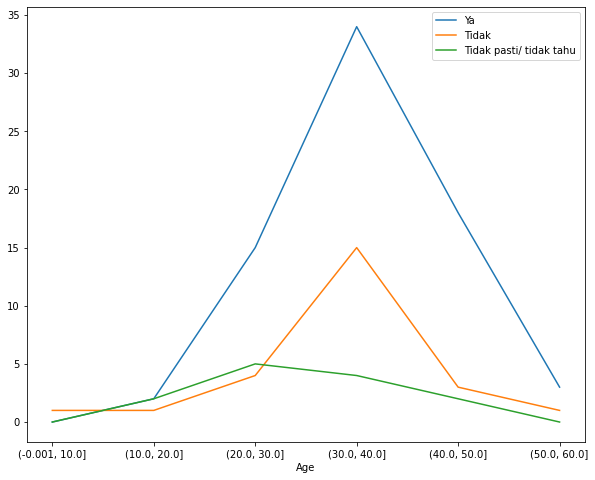

In [73]:
age_vs_can_elearn = relation.interval_vs_distinct(
    normalized_age, normalized_can_elearn, summary_age.index
)

relation.independence_check(age_vs_can_elearn, 0.05) or relation.correlation_check(
    age_vs_can_elearn, 0.05
)


#### Age vs comfortable e-learn

Failed to reject H_0 at alpha=0.05 since test statistic chi2=10.367134550643662 < 18.307038053275146


True

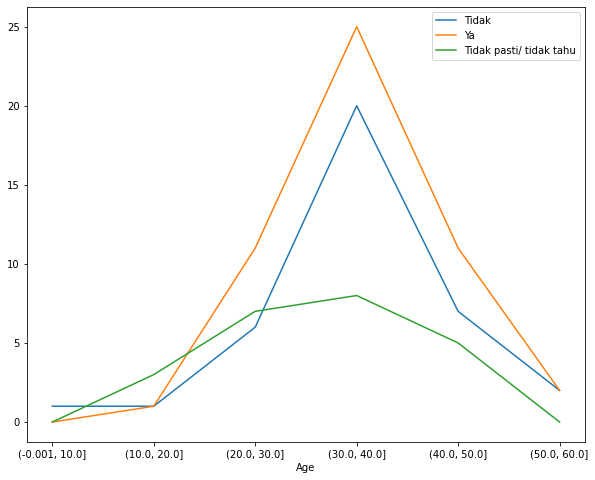

In [74]:
age_vs_comfortable_elearn = relation.interval_vs_distinct(
    normalized_age, normalized_comfortable_elearn, summary_age.index
)

relation.independence_check(
    age_vs_comfortable_elearn, 0.05
) or relation.correlation_check(
    age_vs_comfortable_elearn, alpha=0.05, method="spearman"
)

#### Age vs budget for internet access

Failed to reject H_0 at alpha=0.05 since test statistic chi2=3.9201242192110963 < 26.29622760486423


True

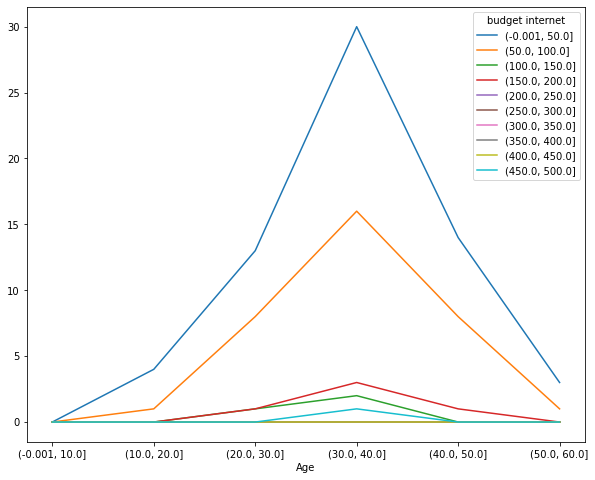

In [75]:
age_vs_budget_internet = relation.interval_vs_interval(
    normalized_age,
    normalized_budget_internet,
    summary_age.index,
    summary_budget_internet.index,
)

relation.independence_check(
    age_vs_budget_internet, 0.05
) or relation.correlation_check(
    age_vs_budget_internet, alpha=0.05, method="spearman"
)

#### Age vs Budget for computer / laptop

Failed to reject H_0 at alpha=0.05 since test statistic chi2=24.15619397437579 < 31.410432844230918


True

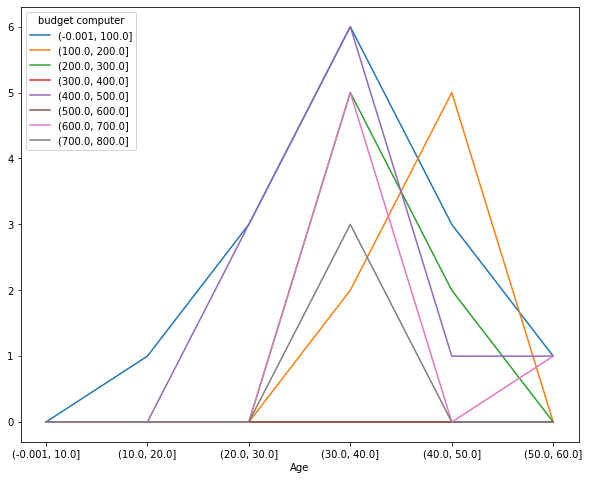

In [76]:
age_vs_budget_computer = relation.interval_vs_interval(
    normalized_age,
    normalized_budget_computer,
    summary_age.index,
    summary_budget_computer.index,
)

relation.independence_check(age_vs_budget_computer, 0.05) or relation.correlation_check(
    age_vs_budget_computer, 0.05, method="spearman"
)


#### Age vs budget for mobile devices

Failed to reject H_0 at alpha=0.05 since test statistic chi2=27.4154543363239 < 41.33713815142739


True

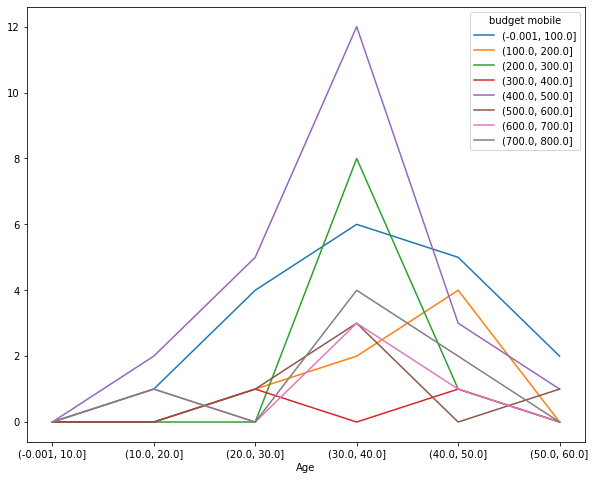

In [77]:
age_vs_budget_mobile = relation.interval_vs_interval(
    normalized_age,
    normalized_budget_mobile,
    summary_age.index,
    summary_budget_mobile.index,
)

relation.independence_check(
    age_vs_budget_mobile, 0.05
) or relation.correlation_check(age_vs_budget_mobile, 0.05, method="spearman")


### vs Gender (Skipping correlation tests)

In [78]:
ranked_gender = pd.Series(['Lelaki', 'Perempuan', 'Transgender'], name=fields.FIELD_GENDER)

#### Gender vs methods used to access government service

Failed to reject H_0 at alpha=0.05 since test statistic chi2=3.763054832623549 < 7.814727903251179


True

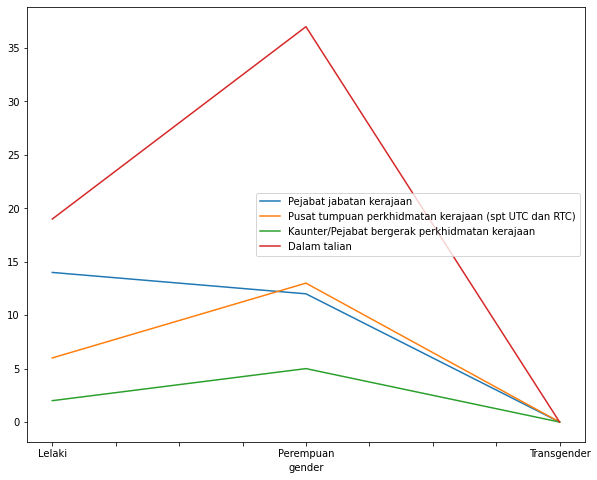

In [79]:
gender_vs_public_access_method = relation.distinct_vs_mcq(
    normalized_gender,
    normalized_public_access_method,
    ranked_gender
)

relation.independence_check(gender_vs_public_access_method, 0.05)

#### Gender vs ownership of different types of devices 

Failed to reject H_0 at alpha=0.05 since test statistic chi2=3.0966906978180715 < 9.487729036781154


True

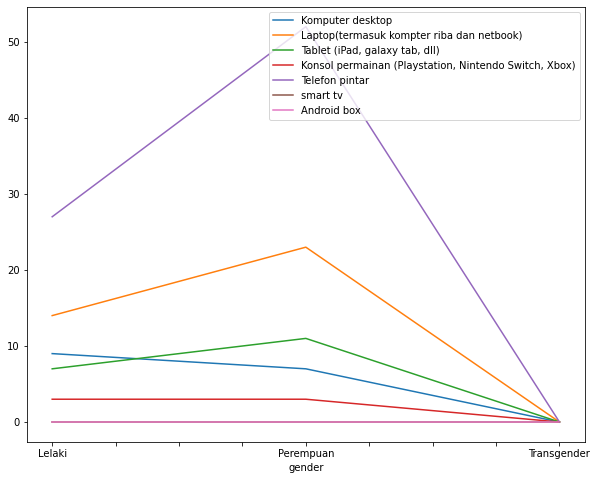

In [80]:
gender_vs_ownership = relation.distinct_vs_mcq(
    normalized_gender, normalized_owned_devices, ranked_gender
)

relation.independence_check(gender_vs_ownership, 0.05)

#### Gender vs whether respondents get to access the internet as much as they desire

Failed to reject H_0 at alpha=0.05 since test statistic chi2=2.351885183781736 < 5.991464547107979


True

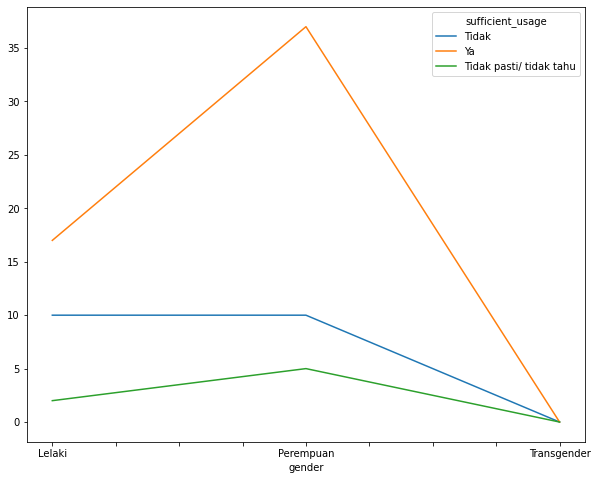

In [81]:
gender_vs_sufficient_usage = relation.distinct_vs_distinct(
    normalized_gender, normalized_sufficient_usage, ranked_gender
)

relation.independence_check(gender_vs_sufficient_usage, 0.05) 

#### Gender vs prior experience in usage of public wifi

Failed to reject H_0 at alpha=0.05 since test statistic chi2=0.22823077944586498 < 5.991464547107979


True

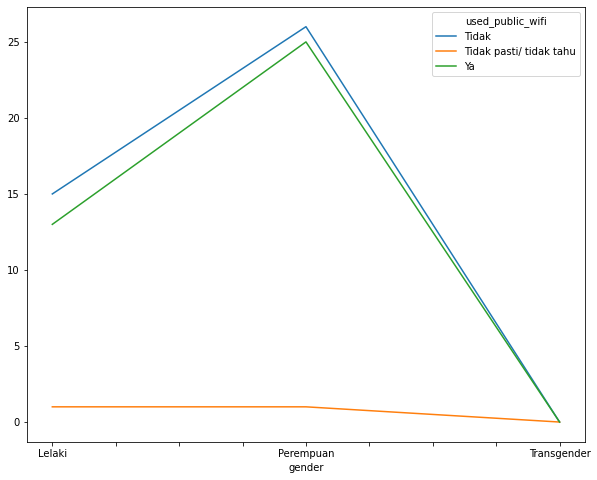

In [82]:
gender_vs_used_public_wifi = relation.distinct_vs_distinct(
    normalized_gender, normalized_used_public_wifi, ranked_gender
)

relation.independence_check(gender_vs_used_public_wifi, 0.05)


#### Gender vs prior experience in usage of public wifi provided by the government

Failed to reject H_0 at alpha=0.05 since test statistic chi2=0.6843103448275859 < 5.991464547107979


True

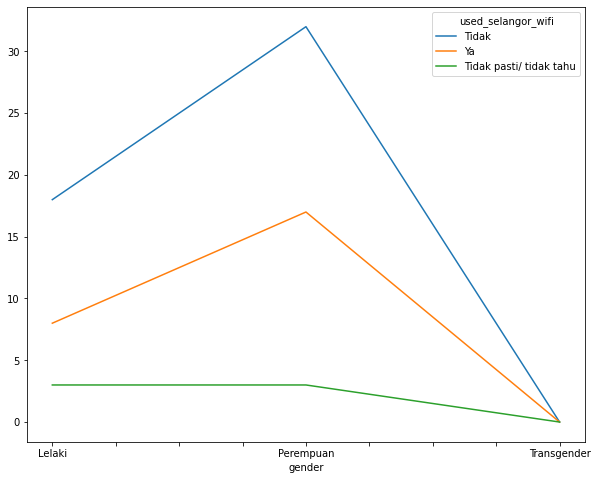

In [83]:
gender_vs_used_selangor_wifi = relation.distinct_vs_distinct(
    normalized_gender, normalized_used_selangor_wifi, ranked_gender
)

relation.independence_check(
    gender_vs_used_selangor_wifi, 0.05
)

#### Gender vs ability to work from home

Failed to reject H_0 at alpha=0.05 since test statistic chi2=2.7442729684108995 < 5.991464547107979


True

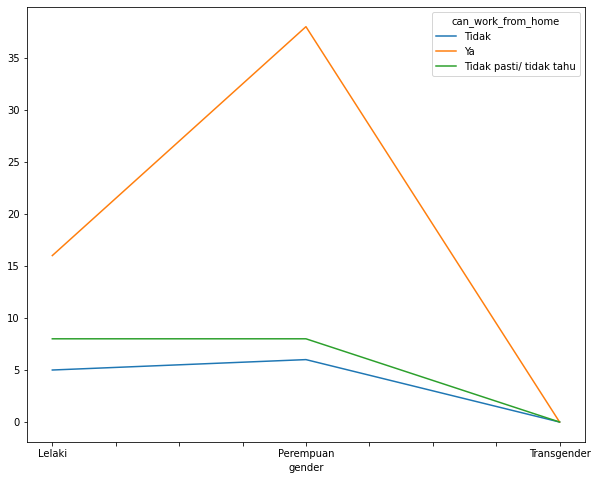

In [84]:
gender_vs_wfh = relation.distinct_vs_distinct(
    normalized_gender,
    normalized_wfh,
    ranked_gender
)

relation.independence_check(gender_vs_wfh, 0.05)

#### Gender vs Comfortable working from home

Failed to reject H_0 at alpha=0.05 since test statistic chi2=1.0239141246684351 < 5.991464547107979


True

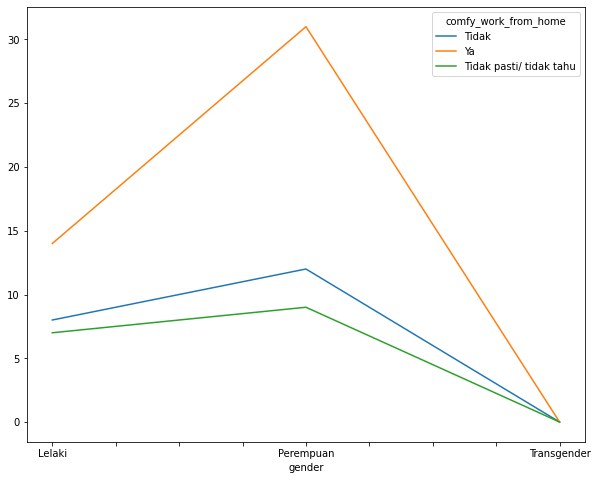

In [85]:
gender_vs_comfortable_wfh = relation.distinct_vs_distinct(
    normalized_gender,
    normalized_comfortable_wfh,
    ranked_gender
)

relation.independence_check(gender_vs_comfortable_wfh, 0.05)

#### Gender vs can e-learn

Failed to reject H_0 at alpha=0.05 since test statistic chi2=1.8433506149023393 < 5.991464547107979


True

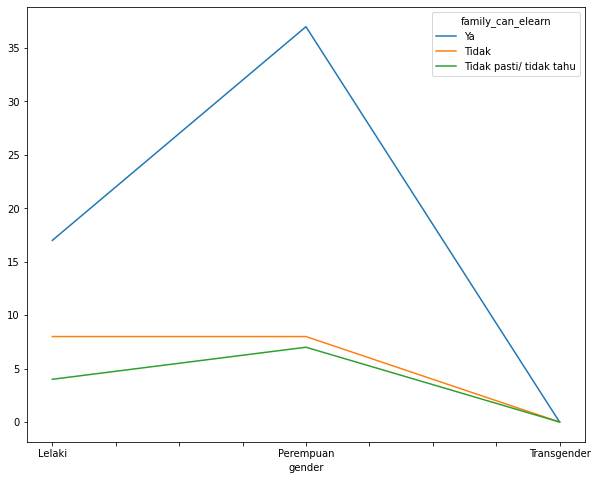

In [86]:
gender_vs_can_elearn = relation.distinct_vs_distinct(
    normalized_gender,
    normalized_can_elearn,
    ranked_gender
)

relation.independence_check(gender_vs_can_elearn, 0.05)

#### Gender vs comfortable e-learn

Failed to reject H_0 at alpha=0.05 since test statistic chi2=2.2290043585518298 < 9.487729036781154


True

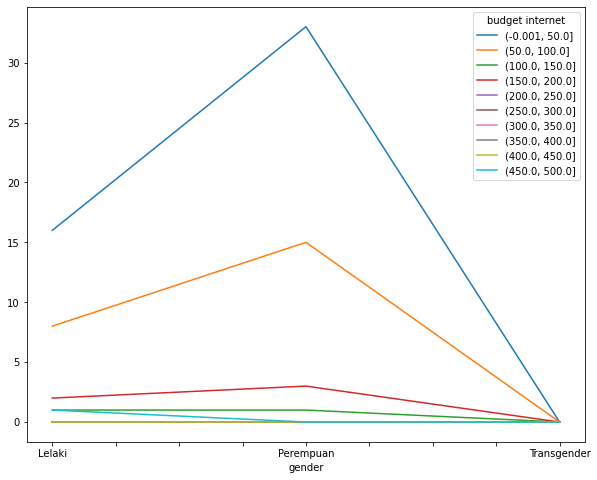

In [87]:
gender_vs_budget_internet = relation.distinct_vs_interval(
    normalized_gender,
    normalized_budget_internet,
    ranked_gender,
    summary_budget_internet.index,
)

relation.independence_check(gender_vs_budget_internet, 0.05)


#### Gender vs budget for internet access

Failed to reject H_0 at alpha=0.05 since test statistic chi2=2.2290043585518298 < 9.487729036781154


True

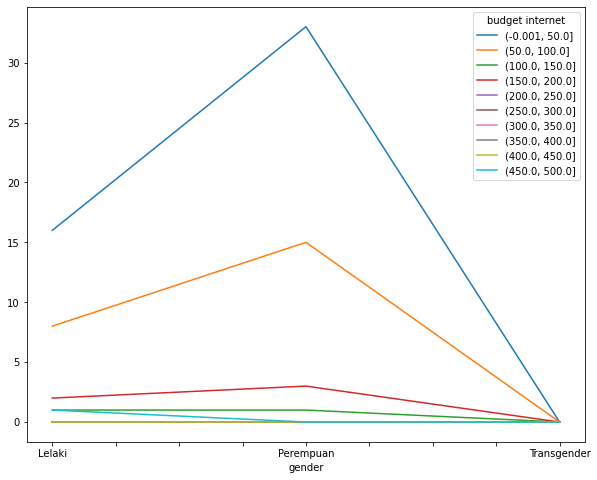

In [88]:
gender_vs_budget_internet = relation.distinct_vs_interval(
    normalized_gender,
    normalized_budget_internet,
    ranked_gender,
    summary_budget_internet.index,
)

relation.independence_check(gender_vs_budget_internet, 0.05)


#### Gender vs budget for computer / laptop

Failed to reject H_0 at alpha=0.05 since test statistic chi2=1.970566239316239 < 11.070497693516351


True

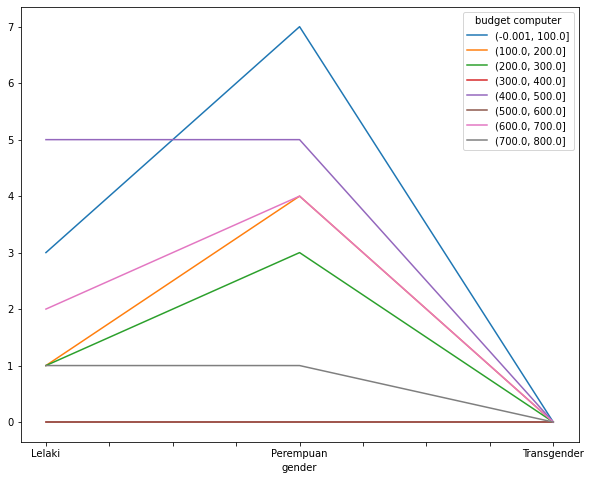

In [89]:
gender_vs_budget_computer = relation.distinct_vs_interval(
    normalized_gender,
    normalized_budget_computer,
    ranked_gender,
    summary_budget_computer.index,
)

relation.independence_check(gender_vs_budget_computer, 0.05)


#### Gender vs budget for mobile devices

Failed to reject H_0 at alpha=0.05 since test statistic chi2=3.7301061551061556 < 14.067140449340169


True

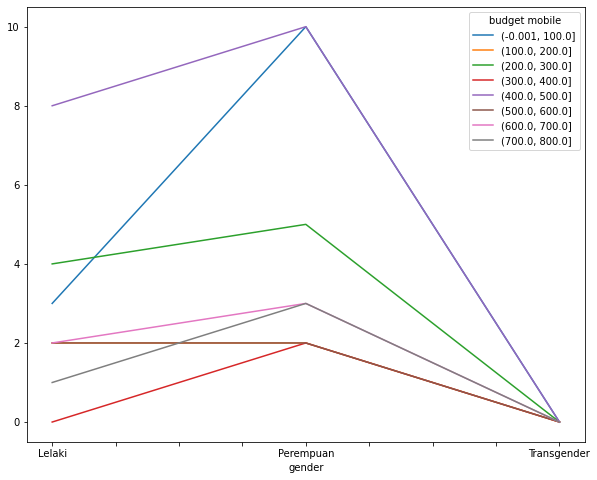

In [90]:
gender_vs_budget_mobile = relation.distinct_vs_interval(
    normalized_gender,
    normalized_budget_mobile,
    ranked_gender,
    summary_budget_mobile.index,
)

relation.independence_check(
    gender_vs_budget_mobile, 0.05
)

### Employment status vs

In [91]:
ranked_employment = pd.Series(
    [
        "Bekerja dengan bergaji (sepenuh masa/ separuh masa)",
        "Bekerja sendiri/ pemilik perniagaan",
        "Pelajar (sepenuh masa /separuh masa)",
        "Tidak bekerja kerana sakit atau kurang upaya",
        "Menganggur / tidak bekerja ( tiada kerja / sedang mencari kerja)",
        "Tentera / Polis / Badan Beruniform",
        "Pesara / Pencen",
        "Memilih tidak menjawab",
    ],
    name=fields.FIELD_EMPLOYMENT_STATUS
)

#### Employment status vs methods used to access government service

Failed to reject H_0 at alpha=0.05 since test statistic chi2=12.348367397502864 < 24.995790139728616


True

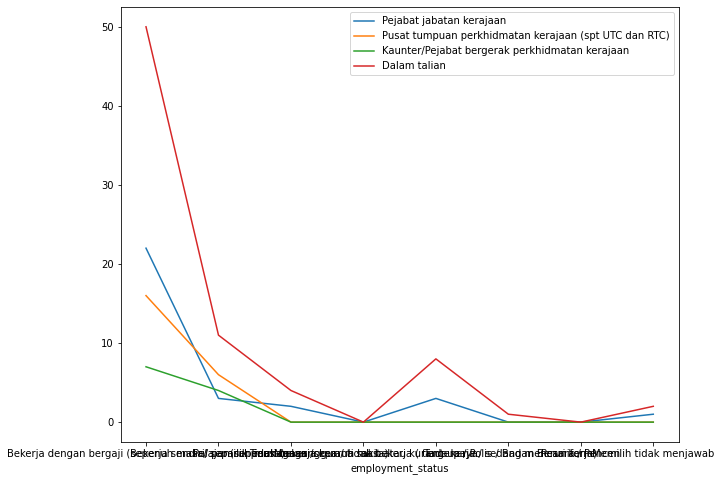

In [92]:
employment_vs_public_access_method = relation.distinct_vs_mcq(
    normalized_employment,
    normalized_public_access_method,
    ranked_employment
)

relation.independence_check(employment_vs_public_access_method, 0.05)

#### Employment status vs the ownership of different types of devices

Failed to reject H_0 at alpha=0.05 since test statistic chi2=11.90457107742921 < 43.77297182574219


True

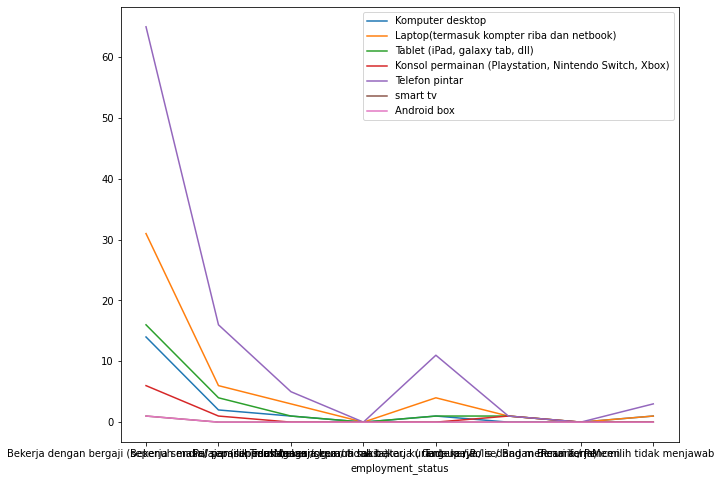

In [93]:
employment_vs_ownership = relation.distinct_vs_mcq(
    normalized_employment, normalized_owned_devices, ranked_employment
)

relation.independence_check(employment_vs_ownership, 0.05)

#### Employment status vs whether respondents get to access the internet as much as they desire

Failed to reject H_0 at alpha=0.05 since test statistic chi2=9.988754127816629 < 18.307038053275146


True

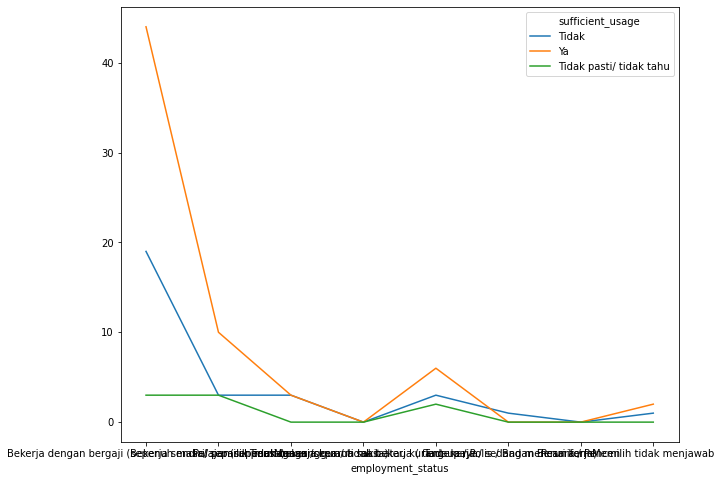

In [94]:
employment_vs_sufficient_usage = relation.distinct_vs_distinct(
    normalized_employment, normalized_sufficient_usage, ranked_employment
)

relation.independence_check(employment_vs_sufficient_usage, 0.05) 

#### Employment status vs prior experience in usage of public wifi

Failed to reject H_0 at alpha=0.05 since test statistic chi2=14.889109384284016 < 18.307038053275146


True

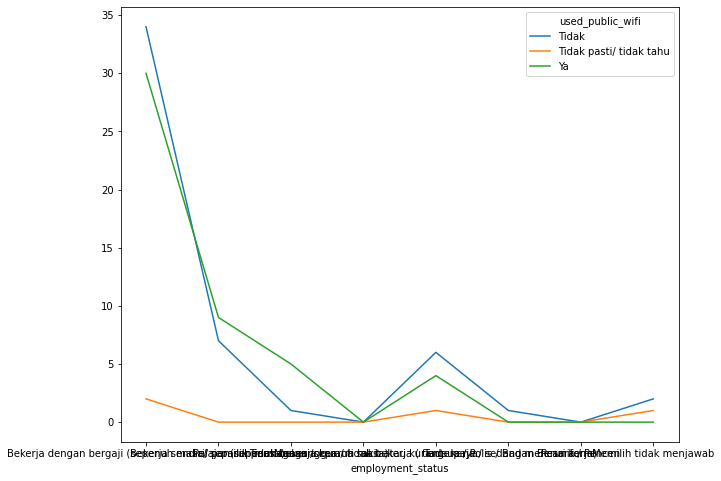

In [95]:
employment_vs_used_public_wifi = relation.distinct_vs_distinct(
    normalized_employment, normalized_used_public_wifi, ranked_employment
)

relation.independence_check(employment_vs_used_public_wifi, 0.05)


#### Employment status vs prior experience in usage of public wifi provided by the government

Failed to reject H_0 at alpha=0.05 since test statistic chi2=15.046049091769973 < 18.307038053275146


True

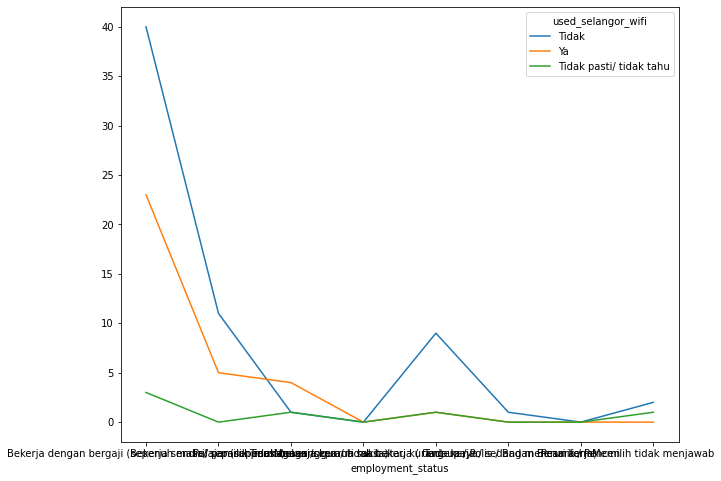

In [96]:
employment_vs_used_selangor_wifi = relation.distinct_vs_distinct(
    normalized_employment, normalized_used_selangor_wifi, ranked_employment
)

relation.independence_check(
    employment_vs_used_selangor_wifi, 0.05
)

#### Employment status vs ability to work from home

Failed to reject H_0 at alpha=0.05 since test statistic chi2=10.800985602291572 < 18.307038053275146


True

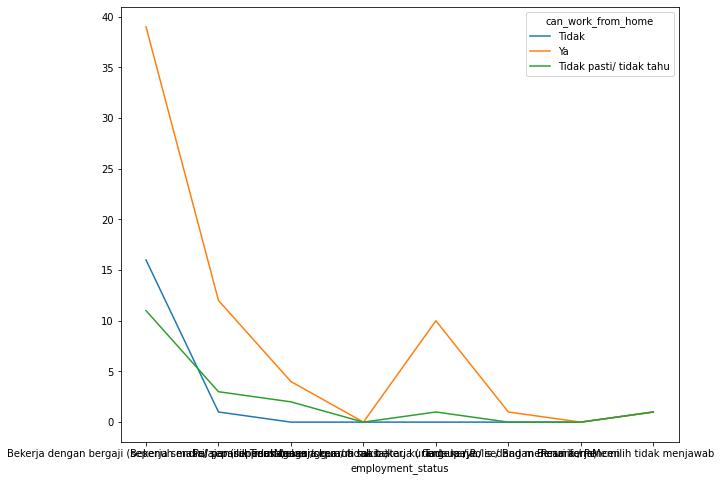

In [97]:
employment_vs_wfh = relation.distinct_vs_distinct(
    normalized_employment,
    normalized_wfh,
    ranked_employment
)

relation.independence_check(employment_vs_wfh, 0.05)

#### Employment status vs being comfortable working from home

Failed to reject H_0 at alpha=0.05 since test statistic chi2=15.368564199873498 < 18.307038053275146


True

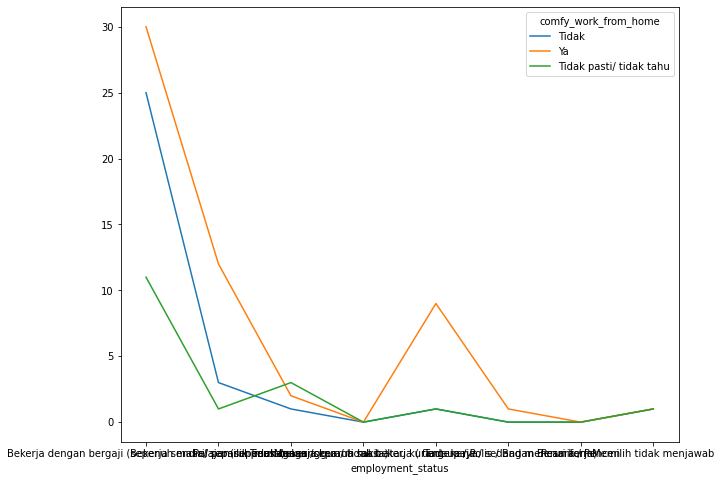

In [98]:
employment_vs_comfortable_wfh = relation.distinct_vs_distinct(
    normalized_employment,
    normalized_comfortable_wfh,
    ranked_employment
)

relation.independence_check(employment_vs_comfortable_wfh, 0.05)

#### Employment status vs can e-learn

Failed to reject H_0 at alpha=0.05 since test statistic chi2=6.111573426573426 < 18.307038053275146


True

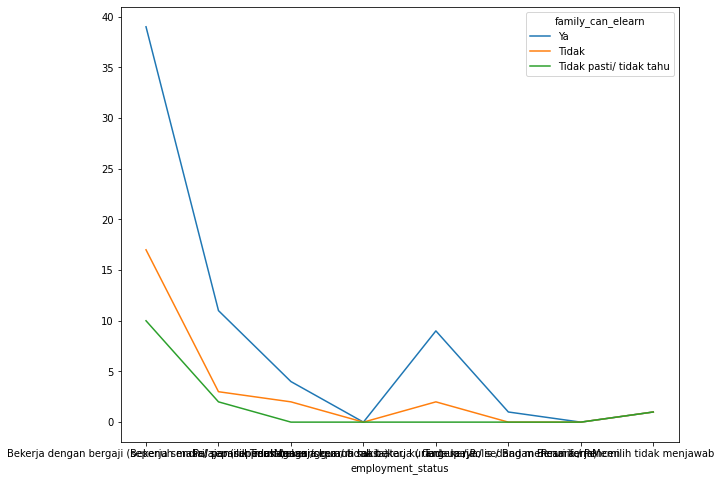

In [99]:
employment_vs_can_elearn = relation.distinct_vs_distinct(
    normalized_employment,
    normalized_can_elearn,
    ranked_employment
)

relation.independence_check(employment_vs_can_elearn, 0.05)

#### Employment status vs comfortable e-learn

Failed to reject H_0 at alpha=0.05 since test statistic chi2=5.927043779316508 < 18.307038053275146


True

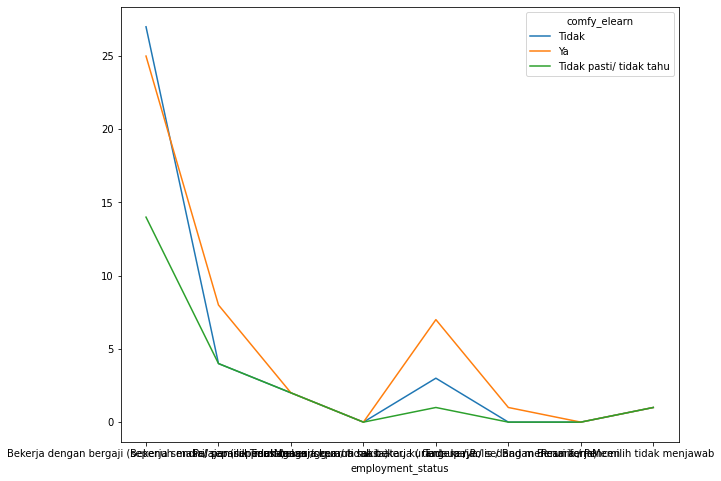

In [100]:
employment_vs_comfortable_elearn = relation.distinct_vs_distinct(
    normalized_employment, normalized_comfortable_elearn, ranked_employment
)

relation.independence_check(employment_vs_comfortable_elearn, 0.05)


#### Employment status vs budget for internet access

Failed to reject H_0 at alpha=0.05 since test statistic chi2=11.638030428353007 < 31.410432844230918


True

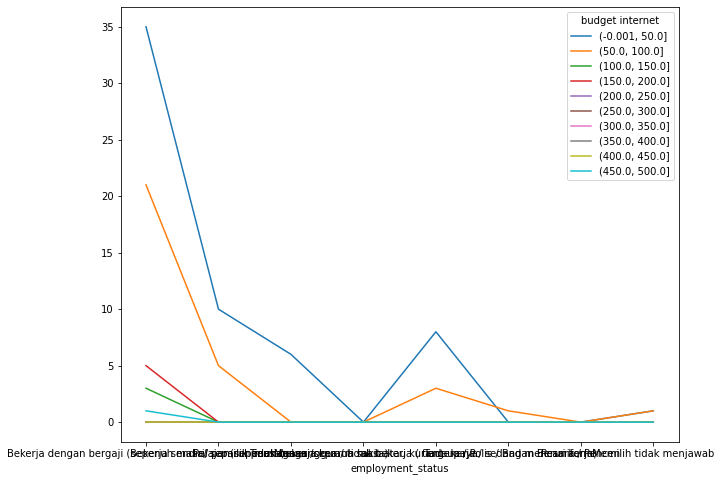

In [101]:
employment_vs_budget_internet = relation.distinct_vs_interval(
    normalized_employment,
    normalized_budget_internet,
    ranked_employment,
    summary_budget_internet.index,
)

relation.independence_check(employment_vs_budget_internet, 0.05)

#### Employment status vs budget for computer / laptop

Failed to reject H_0 at alpha=0.05 since test statistic chi2=15.497734792089632 < 31.410432844230918


True

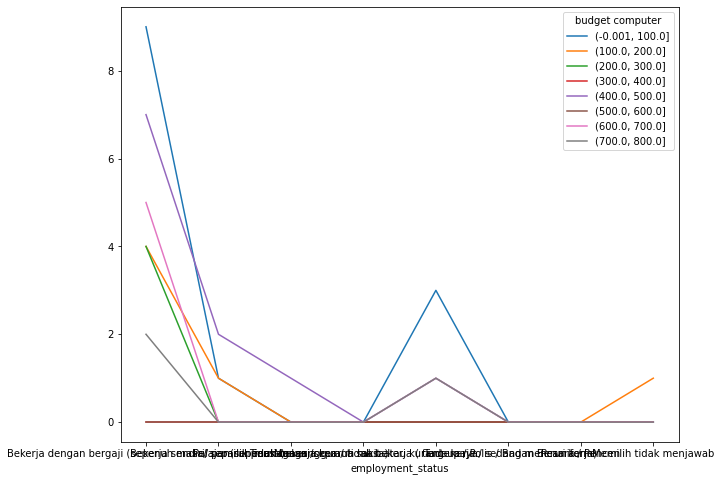

In [102]:
employment_vs_budget_computer = relation.distinct_vs_interval(
    normalized_employment,
    normalized_budget_computer,
    ranked_employment,
    summary_budget_computer.index,
)

relation.independence_check(
    employment_vs_budget_computer, 0.05
)

#### Employment status vs budget for mobile devices

Failed to reject H_0 at alpha=0.05 since test statistic chi2=27.046212121212122 < 41.33713815142739


True

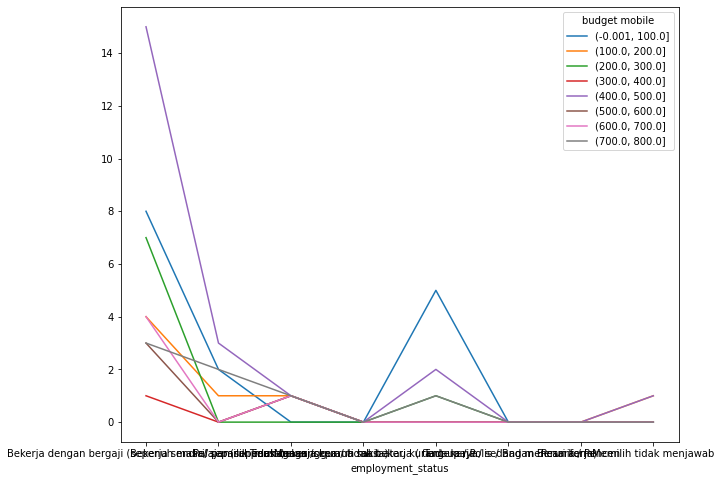

In [103]:
employment_vs_budget_mobile = relation.distinct_vs_interval(
    normalized_employment,
    normalized_budget_mobile,
    ranked_employment,
    summary_budget_mobile.index,
)

relation.independence_check(employment_vs_budget_mobile, 0.05)
